# Loan Approval Risk Analysis


### Description:
Analyse loan application data to identify risk profiles. The goal is to make informed loan approval decisions to minimise financial losses and optimise business outcomes.

### Dataset:
1. dictionary:
https://docs.google.com/spreadsheets/d/1gnDzstdzbwNRp5PU-5SirDQBnOvYfMgWezxvq4UDp-A/edit?gid=848427739#gid=848427739
2. user:
https://docs.google.com/spreadsheets/d/1gnDzstdzbwNRp5PU-5SirDQBnOvYfMgWezxvq4UDp-A/edit?gid=441866716#gid=441866716
3. loan:
https://drive.google.com/file/d/1ABEjY1kOP-m5rG86iiIsz6uLJ7tRYcT0/view

### Outline:
1. Data Extraction
2. Data Cleaning
3. Exploratory Data Analysis
4. Customer Segmentation
5. Risk Profile Identification
6. Insights and Business Recommendations

### Objective:
1. Identify risk profiles of loan applicants to reduce financial losses from defaults.
2. Optimise loan approval processes to attract creditworthy customers and improve business outcomes.

## Import Libraries

In [ ]:
# Import pandas library for data manipulation and analysis
import pandas as pd

# Import gdown library for downloading files from Google Drive (if needed)
import gdown

# Import numpy library for scientific computing and array manipulation
import numpy as np

# Import datetime library for working with dates and times
from datetime import datetime

# Import matplotlib.pyplot for creating visualizations (plots)
import matplotlib.pyplot as plt

# Import seaborn library for creating statistical data visualizations
import seaborn as sns

# Import warnings library to suppress warnings (use with caution)
import warnings
warnings.filterwarnings("ignore")  # **Caution:** May hide important warnings

# Set pandas display options to show all columns in the DataFrame (might be inconvenient for large datasets)
pd.set_option('display.max_columns', None)

# Import libraries from scipy.stats for statistical tests
from scipy.stats import shapiro, skew

# Import libraries from sklearn.preprocessing for data scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Import libraries from sklearn.cluster for clustering algorithms
from sklearn import cluster

# Untuk melakukan analisis siluet untuk k-means clustering
from yellowbrick.cluster import SilhouetteVisualizer

plt.rcParams['axes.grid'] = False

## 1. Data Extraction

### 1.1 User (Spreadsheet)

In [ ]:
# Import dataset from spreadsheet
sheet_url = 'https://docs.google.com/spreadsheets/d/1gnDzstdzbwNRp5PU-5SirDQBnOvYfMgWezxvq4UDp-A/edit?gid=441866716#gid=441866716'
sheet_url_replace = sheet_url.replace('/edit?gid=', '/export?format=csv&gid=') # To convert the spreadsheet format into csv

print(sheet_url_replace) # To show the link to csv

df_users_og = pd.read_csv(sheet_url_replace) # To load/read the csv into pandas dataframe
df_users_og.head() # Show only first 5 rows

https://docs.google.com/spreadsheets/d/1gnDzstdzbwNRp5PU-5SirDQBnOvYfMgWezxvq4UDp-A/export?format=csv&gid=441866716#gid=441866716


,id,emp_title,emp_length,annual_inc,income_expense_ratio,verification_status,home_ownership,address,state_code,region,grade
0,148271,sales,2 years,45000.0,34.19,Not Verified,MORTGAGEX,"002 Taylor Divide\nMichellefurt, KY 30723",KY,South,B
1,218833,Palm Beach Cardiology,3 years,80000.0,22.43,Not Verified,MORTGAGEE,"4341 Rivera Park Apt. 589\nColleenshire, ND 29597",ND,Midwest,B
2,218833,Palm Beach Cardiology,3 years,80000.0,22.43,Not Verified,MORTGAGEE,"4341 Rivera Park Apt. 589\nColleenshire, ND 29597",ND,Midwest,B
3,383111,Truck Dealership,3 years,50150.0,10.24,Not Verified,MORTGAGE,"00404 Ian Drive\nChrismouth, NE 70466",NE,Midwest,A
4,258042,NaN,NaN,31600.0,12.00,Verified,MORTGAGE,"9835 Oneal Mountain\nSouth Joseph, DC 11650",DC,South,B


In [ ]:
# Make a copy of the original data for data cleaning
df_users_dc = df_users_og.copy()

### 1.2 Loan (Google Drive)

In [ ]:
url = "https://drive.google.com/file/d/1ABEjY1kOP-m5rG86iiIsz6uLJ7tRYcT0/view"
output = "loan.csv"
gdown.download(url, output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1ABEjY1kOP-m5rG86iiIsz6uLJ7tRYcT0
To: /content/loan.csv
100%|██████████| 855k/855k [00:00<00:00, 104MB/s]


'loan.csv'

In [ ]:
df_loan_og = pd.read_csv('/content/loan.csv')
df_loan_og

,id,loan_status,purpose,application_type,issue_month,term,loan_amnt,installment,int_rate
0,148271,Fully Paid,credit_card,INDIVIDUAL,Aug-2015,36 months,2000.0,69.93,15.61
1,218833,Fully Paid,credit_card,INDIVIDUAL,Apr-2010,36 months,15000.0,506.18,13.11
2,383111,Fully Paid,debt_consolidation,INDIVIDUAL,Jun-2013,36 months,10000.0,328.06,11.14
3,258042,Charged Off,debt_consolidation,INDIVIDUAL,Oct-2014,36 months,8750.0,308.88,16.29
4,167468,Fully Paid,credit_card,INDIVIDUAL,Jan-2014,36 months,12000.0,398.52,11.99
...,...,...,...,...,...,...,...,...,...
9995,385122,Charged Off,home_improvement,INDIVIDUAL,Jul-2014,60 months,30800.0,833.08,20.99
9996,277410,Fully Paid,major_purchase,INDIVIDUAL,Sep-2012,36 months,6475.0,222.34,14.33
9997,132276,Fully Paid,other,INDIVIDUAL,Oct-2013,36 months,8000.0,285.63,17.10
9998,282878,Charged Off,debt_consolidation,INDIVIDUAL,Jan-2014,60 months,12500.0,325.78,19.22


In [ ]:
# Make a copy of the original data for data cleaning
df_loan_dc = df_loan_og.copy()

## 2. Data Cleaning

### 2.1 User

#### 2.1.1 Understanding the Dataset

In [ ]:
df_users_dc.shape
print('Number of rows is: ', df_users_dc.shape[0])
print('Number of columns is: ', df_users_dc.shape[1])

Number of rows is:  10007
Number of columns is:  11


In [ ]:
df_users_dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10007 entries, 0 to 10006
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10007 non-null  int64  
 1   emp_title             9376 non-null   object 
 2   emp_length            9495 non-null   object 
 3   annual_inc            10007 non-null  float64
 4   income_expense_ratio  10007 non-null  float64
 5   verification_status   10007 non-null  object 
 6   home_ownership        10007 non-null  object 
 7   address               10007 non-null  object 
 8   state_code            10007 non-null  object 
 9   region                8931 non-null   object 
 10  grade                 10007 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 860.1+ KB


#### 2.1.2 Convert Data Type

*`id` can be changed into string since no mathematical operations will be performed on it.*

In [ ]:
# Change id data type into string
df_users_dc['id'] = df_users_dc['id'].astype(str)

In [ ]:
#Check the data type of id after converted
df_users_dc.dtypes

,0
id,object
emp_title,object
emp_length,object
annual_inc,float64
income_expense_ratio,float64
verification_status,object
home_ownership,object
address,object
state_code,object
region,object


#### 2.1.3 Checking for Unique Values and Handle Typo Data

In [ ]:
# Check unique data in categorical columns
for column in df_users_dc.select_dtypes(include=['object']).columns:
  num_unique = df_users_dc[column].nunique()
  print(f"Number of unique '{column}' is {num_unique}")

Number of unique 'id' is 10000
Number of unique 'emp_title' is 6780
Number of unique 'emp_length' is 11
Number of unique 'verification_status' is 3
Number of unique 'home_ownership' is 8
Number of unique 'address' is 9999
Number of unique 'state_code' is 54
Number of unique 'region' is 4
Number of unique 'grade' is 3


*We will be checking for typos in specific columns of a dataset. The columns we will be checking are:*
* *emp_length*
* *verification_status*
* *home_ownership*
* *state_code*
* *region*
* *grade*

*The other columns in the dataset are too diverse to check for typos*

*The diverse columns are:*
* *emp_title*
* *address*

In [ ]:
# Count the values
list_obj = ['emp_length','verification_status','home_ownership','region','grade','state_code']

for i in list_obj:
    unique_data = df_users_dc[i].value_counts()
    print(unique_data.to_markdown(), '\n\n')

| emp_length   |   count |
|:-------------|--------:|
| 10+ years    |    3166 |
| 2 years      |     885 |
| 3 years      |     811 |
| < 1 year     |     805 |
| 5 years      |     668 |
| 1 year       |     650 |
| 4 years      |     587 |
| 7 years      |     550 |
| 6 years      |     506 |
| 8 years      |     492 |
| 9 years      |     375 | 


| verification_status   |   count |
|:----------------------|--------:|
| Verified              |    3632 |
| Source Verified       |    3449 |
| Not Verified          |    2926 | 


| home_ownership   |   count |
|:-----------------|--------:|
| MORTGAGE         |    4862 |
| RENT             |    4146 |
| OWN              |     988 |
| RENTA            |       4 |
| OWNN             |       3 |
| MORTGAGEE        |       2 |
| MORTGAGEX        |       1 |
| OTHER            |       1 | 


| region    |   count |
|:----------|--------:|
| South     |    3026 |
| West      |    2234 |
| Midwest   |    2095 |
| Northeast |    1576 | 


| g

1. *We will create a new category from the `emp_length` column.*
2. *There are no typos in the `verification_status` column because the values are present in the data dictionary.*
3. <font color='red'>*There are typos in the `home_ownership` column, and we will consolidate similar values by replacing values with fewer data instances with values that have more data instances.*</font>
4. *There are no typos in the `region`, `grade`, and `state_code` columns because the values are either existing or valid.*




##### a. Handle Typo Data in Column `home_ownership`

In [ ]:
# Fix typos into only 'MORTGAGE','OWN' and 'RENT'
df_users_dc['home_ownership'].replace(["MORTGAGEE","MORTGAGEX"],'MORTGAGE', inplace = True)
df_users_dc['home_ownership'].replace("OWNN","OWN", inplace = True)
df_users_dc['home_ownership'].replace("RENTA","RENT", inplace = True)

*Since `other` only 1 data we can delete it*

In [ ]:
# Exclude OTHER (other way to drop/exclude values)
df_users_dc = df_users_dc[df_users_dc['home_ownership']!="OTHER"]

In [ ]:
# To confirm the changes after fixing the typos
df_users_dc['home_ownership'].value_counts().reset_index()

,home_ownership,count
0,MORTGAGE,4865
1,RENT,4150
2,OWN,991


#### 2.1.4 Irrelavant Values

*Based on the [finding](#scrollTo=lW0tL5FHItBt&line=11&uniqifier=1), we have determined that the `emp_title` and `address` columns contain diverse data. However, due to the likelihood of these columns being unsuitable for our analysis, we will proceed with deleting them.*

In [ ]:
df_users_dc.drop(['emp_title','address'], axis=1, inplace=True)

In [ ]:
# Confirm the dropped data by looking at the columns
df_users_dc.columns.to_list()

['id',
 'emp_length',
 'annual_inc',
 'income_expense_ratio',
 'verification_status',
 'home_ownership',
 'state_code',
 'region',
 'grade']

#### 2.1.5 Missing Values

In [ ]:
# Number of missing values in each column
df_users_dc.isnull().sum()

,0
id,0
emp_length,512
annual_inc,0
income_expense_ratio,0
verification_status,0
home_ownership,0
state_code,0
region,1076
grade,0


* *emp_length, 512 row null*
* *region, 1076 row nulls*



##### a. Handle Missing Values in Column `emp_length`

*Since we want to make this into a bin, we can remove the null value since this can interfere our analysis.*

In [ ]:
# Remove null values
df_users_dc.dropna(subset=['emp_length'], inplace=True)

##### b. Handle Missing Values in Column `region`

*Option : We can change it based on the `state_code`, or just change it to `Unknown`*

*Here we change the data into `Unknown`*

In [ ]:
# Impute missing values with "Unknown"
df_users_dc['region'].fillna("Unknown",inplace = True)

*To make sure we need to see what is the `Unknown` region related to with the `state_code`*

In [ ]:
pd.set_option("display.max_colwidth", None) # Display col width to 100 char
regions_statecode = df_users_dc.groupby(['region'])['state_code'].unique() # Group by region, and state_code unique values

# Reset the index to create columns
regions_statecode = regions_statecode.reset_index(name='state_code')
regions_statecode

,region,state_code
0,Midwest,"[ND, NE, MO, IN, IL, WI, MN, OH, MI, SD, KS, IA]"
1,Northeast,"[CT, RI, NY, NJ, VT, ME, PA, MA, NH]"
2,South,"[KY, TX, TN, MS, GA, VA, MD, NC, FL, DC, AR, OK, AL, SC, LA, WV, DE]"
3,Unknown,"[AE, AA, AP]"
4,West,"[OR, WA, UT, ID, AK, MT, AZ, WY, CA, HI, NV, CO, NM]"


*When we see by region, the `Unknown` region are consist of AE, AA and AP which are part of US military region :*
* *AE for U.S. Armed Forces – Europe,*
* *AA for U.S. Armed Forces – Americas,*
* *AP for U.S. Armed Forces – Pacific*

*Source : https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations*

*By looking at this we know that the `Unknown` are listed, but is not actually in us*

*Since we just want to analyze the user currently in the us, we are going to exclude the `Unknown` region.*

In [ ]:
# Exclude the Unknown values
df_users_dc = df_users_dc[df_users_dc['region'] != 'Unknown']

In [ ]:
# To confirm the deletion is successful
df_users_dc['region'].value_counts().reset_index()

,region,count
0,South,2883
1,West,2118
2,Midwest,1992
3,Northeast,1485


In [ ]:
# Confirm whether null data still exist
df_users_dc.isnull().sum()

,0
id,0
emp_length,0
annual_inc,0
income_expense_ratio,0
verification_status,0
home_ownership,0
state_code,0
region,0
grade,0


*All null's has been treated*


In [ ]:
# Check the data we have
df_users_dc.shape
print('Number of rows is: ', df_users_dc.shape[0])
print('Number of columns is: ', df_users_dc.shape[1])

Number of rows is:  8478
Number of columns is:  9


#### 2.1.6 Data Manipulation

*As [mentioned earlier](#scrollTo=p36x-8ljL1Se), We will create a new category from the `emp_length` column.*

*Creating a bin for the `emp_length`*

In [ ]:
# Check the unique values and the counts
df_users_dc['emp_length'].value_counts().reset_index()

,emp_length,count
0,10+ years,2810
1,2 years,798
2,< 1 year,723
3,3 years,717
4,5 years,605
5,1 year,574
6,4 years,518
7,7 years,490
8,6 years,462
9,8 years,442


In [ ]:
# To make it easier to assign the data into the bin / category we assign the column into a variable
a = df_users_dc['emp_length']

In [ ]:
# Here we also decided to assign it into different column
df_users_dc.loc[(a == '< 1 year') | (a == '1 year') | (a=='2 years'), 'emp_experience'] = 'Rookies'
df_users_dc.loc[(a == '3 years') | (a == '4 years') | (a=='5 years') | (a=='6 years'), 'emp_experience'] = 'Mid-Level'
df_users_dc.loc[(a == '7 years') | (a == '8 years') | (a=='9 years') | (a=='10+ years'), 'emp_experience'] = 'Senior'

In [ ]:
# To confirm the data after we create the categories
df_users_dc['emp_experience'].value_counts().reset_index()

,emp_experience,count
0,Senior,4081
1,Mid-Level,2302
2,Rookies,2095


In [ ]:
# Check the data we have
df_users_dc.shape
print('Number of rows is: ', df_users_dc.shape[0])
print('Number of columns is: ', df_users_dc.shape[1])

Number of rows is:  8478
Number of columns is:  10


#### 2.1.7 Duplicated Data

In [ ]:
# Check the duplicated
df_users_dc[df_users_dc['id'].duplicated()]

,id,emp_length,annual_inc,income_expense_ratio,verification_status,home_ownership,state_code,region,grade,emp_experience
2,218833,3 years,80000.0,22.43,Not Verified,MORTGAGE,ND,Midwest,B,Mid-Level
10002,385122,4 years,105000.0,4.89,Verified,MORTGAGE,NC,South,C,Mid-Level
10003,277410,10+ years,111000.0,22.29,Not Verified,MORTGAGE,WY,West,B,Senior
10004,132276,9 years,65000.0,10.47,Not Verified,MORTGAGE,WY,West,B,Senior
10005,282878,1 year,35000.0,18.96,Verified,RENT,SD,Midwest,B,Rookies
10006,276032,10+ years,104500.0,21.45,Verified,MORTGAGE,NC,South,B,Senior


*It is showing that duplicate data are exist, so we need to remove it based on the `id` since 1 `id` in user should be only 1 per `id`.*

In [ ]:
# Exclude the duplicate
df_users_dc.drop_duplicates('id', keep = 'first', inplace = True)

In [ ]:
# Check the data we have
df_users_dc.shape
print('Number of rows is: ', df_users_dc.shape[0])

Number of rows is:  8472


*From previous step we have removed 6 duplicate.*

#### 2.1.8 User Cleaned Data

In [ ]:
# Create a copy after cleaning for other purpose, and its easier if there is something forgoten and needed to be clean later
df_users = df_users_dc.copy()
df_users.head()

,id,emp_length,annual_inc,income_expense_ratio,verification_status,home_ownership,state_code,region,grade,emp_experience
0,148271,2 years,45000.0,34.19,Not Verified,MORTGAGE,KY,South,B,Rookies
1,218833,3 years,80000.0,22.43,Not Verified,MORTGAGE,ND,Midwest,B,Mid-Level
3,383111,3 years,50150.0,10.24,Not Verified,MORTGAGE,NE,Midwest,A,Mid-Level
6,167468,8 years,79000.0,14.64,Verified,MORTGAGE,OR,West,A,Senior
7,337956,< 1 year,60000.0,25.42,Source Verified,RENT,WA,West,C,Rookies


In [ ]:
# For summary after data cleaning
df_users.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8472 entries, 0 to 10001
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    8472 non-null   object 
 1   emp_length            8472 non-null   object 
 2   annual_inc            8472 non-null   float64
 3   income_expense_ratio  8472 non-null   float64
 4   verification_status   8472 non-null   object 
 5   home_ownership        8472 non-null   object 
 6   state_code            8472 non-null   object 
 7   region                8472 non-null   object 
 8   grade                 8472 non-null   object 
 9   emp_experience        8472 non-null   object 
dtypes: float64(2), object(8)
memory usage: 728.1+ KB


### 2.2 Loan

In [ ]:
df_loan_dc.head()

,id,loan_status,purpose,application_type,issue_month,term,loan_amnt,installment,int_rate
0,148271,Fully Paid,credit_card,INDIVIDUAL,Aug-2015,36 months,2000.0,69.93,15.61
1,218833,Fully Paid,credit_card,INDIVIDUAL,Apr-2010,36 months,15000.0,506.18,13.11
2,383111,Fully Paid,debt_consolidation,INDIVIDUAL,Jun-2013,36 months,10000.0,328.06,11.14
3,258042,Charged Off,debt_consolidation,INDIVIDUAL,Oct-2014,36 months,8750.0,308.88,16.29
4,167468,Fully Paid,credit_card,INDIVIDUAL,Jan-2014,36 months,12000.0,398.52,11.99


#### 2.2.1 Understanding the Dataset

In [ ]:
df_loan_dc.shape
print('Number of rows is: ', df_loan_dc.shape[0])
print('Number of columns is: ', df_loan_dc.shape[1])

Number of rows is:  10000
Number of columns is:  9


In [ ]:
df_loan_dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                10000 non-null  int64  
 1   loan_status       10000 non-null  object 
 2   purpose           10000 non-null  object 
 3   application_type  10000 non-null  object 
 4   issue_month       10000 non-null  object 
 5   term              10000 non-null  object 
 6   loan_amnt         10000 non-null  float64
 7   installment       10000 non-null  float64
 8   int_rate          10000 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 703.2+ KB


#### 2.2.2 Convert Data Type

##### a. Convert Data Type in Column `id`

*`id` can be changed into string since no mathematical operations will be performed on it.*


In [ ]:
# Change id data type into string
df_loan_dc['id'] = df_loan_dc['id'].astype(str)

In [ ]:
#Check the data type of id after converted
df_loan_dc.dtypes

,0
id,object
loan_status,object
purpose,object
application_type,object
issue_month,object
term,object
loan_amnt,float64
installment,float64
int_rate,float64


##### b. Convert Data Type in Column `issue_month`

*Change `issue month` into date*

In [ ]:
#Check the data type of issue_month before converted
print('type issue_month before transformation is ',type(df_loan_dc['issue_month'][0]))

type issue_month before transformation is  <class 'str'>


In [ ]:
#To convert the issue_month into datetime data type
df_loan_dc['issue_month'] = pd.to_datetime(df_loan_dc['issue_month'], format='%b-%Y')

In [ ]:
#Check the data type of issue_month after converted
print('type issue_month after transformation is ',type(df_loan_dc['issue_month'][0]))

type issue_month after transformation is  <class 'pandas._libs.tslibs.timestamps.Timestamp'>


#### 2.2.3 Checking for Unique Values and Handle Typo Data

In [ ]:
# Check unique data in categorical columns
for column in df_loan_dc.select_dtypes(include=['object']).columns:
  num_unique = df_loan_dc[column].nunique()
  print(f"Number of unique '{column}' is {num_unique}")

Number of unique 'id' is 10000
Number of unique 'loan_status' is 2
Number of unique 'purpose' is 14
Number of unique 'application_type' is 3
Number of unique 'term' is 2


*We will be checking for typos in specific columns of a dataset. The columns we will be checking are:*
* *loan_status*
* *purpose*
* *application_type*
* *term*

In [ ]:
# Count the values
list_obj = ['loan_status','purpose','application_type','term']

for i in list_obj:
    unique_data = df_loan_dc[i].value_counts()
    print(unique_data.to_markdown(), '\n\n')

| loan_status   |   count |
|:--------------|--------:|
| Fully Paid    |    6063 |
| Charged Off   |    3937 | 


| purpose            |   count |
|:-------------------|--------:|
| debt_consolidation |    6054 |
| credit_card        |    2007 |
| home_improvement   |     555 |
| other              |     551 |
| major_purchase     |     214 |
| small_business     |     158 |
| medical            |     111 |
| moving             |      85 |
| car                |      82 |
| house              |      69 |
| vacation           |      67 |
| wedding            |      36 |
| renewable_energy   |       7 |
| educational        |       4 | 


| application_type   |   count |
|:-------------------|--------:|
| INDIVIDUAL         |    9983 |
| JOINT              |      10 |
| DIRECT_PAY         |       7 | 


| term      |   count |
|:----------|--------:|
| 36 months |    7225 |
| 60 months |    2775 | 




<font color='red'> *There are no typos because the values are present in the data dictionary, as well as the values are either existing or valid.* </font>




#### 2.2.4 Missing Values

In [ ]:
# Number of missing values in each column
df_loan_dc.isnull().sum()

,0
id,0
loan_status,0
purpose,0
application_type,0
issue_month,0
term,0
loan_amnt,0
installment,0
int_rate,0


*There are no missing values detected*

#### 2.2.5 Duplicated Data

In [ ]:
# Check the duplicated
df_loan_dc[df_loan_dc['id'].duplicated()]

,id,loan_status,purpose,application_type,issue_month,term,loan_amnt,installment,int_rate


*No duplicated data*

#### 2.2.6 Loan Cleaned Data

In [ ]:
# Create a copy after cleaning for other purpose, and its easier if there is something forgoten and needed to be clean later
df_loan = df_loan_dc.copy()
df_loan.head()

,id,loan_status,purpose,application_type,issue_month,term,loan_amnt,installment,int_rate
0,148271,Fully Paid,credit_card,INDIVIDUAL,2015-08-01,36 months,2000.0,69.93,15.61
1,218833,Fully Paid,credit_card,INDIVIDUAL,2010-04-01,36 months,15000.0,506.18,13.11
2,383111,Fully Paid,debt_consolidation,INDIVIDUAL,2013-06-01,36 months,10000.0,328.06,11.14
3,258042,Charged Off,debt_consolidation,INDIVIDUAL,2014-10-01,36 months,8750.0,308.88,16.29
4,167468,Fully Paid,credit_card,INDIVIDUAL,2014-01-01,36 months,12000.0,398.52,11.99


In [ ]:
# For summary after data cleaning
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                10000 non-null  object        
 1   loan_status       10000 non-null  object        
 2   purpose           10000 non-null  object        
 3   application_type  10000 non-null  object        
 4   issue_month       10000 non-null  datetime64[ns]
 5   term              10000 non-null  object        
 6   loan_amnt         10000 non-null  float64       
 7   installment       10000 non-null  float64       
 8   int_rate          10000 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 703.2+ KB


### 2.3 Merge Data

*Since we want to analyze the user and the loan, it is feels right to have both data available and none of them are null.*
*Thats why we use inner join.*

In [ ]:
# Merge the table
df_merged = df_users.merge(df_loan, how='inner', left_on =['id'], right_on = ['id'])
df_merged.head()

,id,emp_length,annual_inc,income_expense_ratio,verification_status,home_ownership,state_code,region,grade,emp_experience,loan_status,purpose,application_type,issue_month,term,loan_amnt,installment,int_rate
0,148271,2 years,45000.0,34.19,Not Verified,MORTGAGE,KY,South,B,Rookies,Fully Paid,credit_card,INDIVIDUAL,2015-08-01,36 months,2000.0,69.93,15.61
1,218833,3 years,80000.0,22.43,Not Verified,MORTGAGE,ND,Midwest,B,Mid-Level,Fully Paid,credit_card,INDIVIDUAL,2010-04-01,36 months,15000.0,506.18,13.11
2,383111,3 years,50150.0,10.24,Not Verified,MORTGAGE,NE,Midwest,A,Mid-Level,Fully Paid,debt_consolidation,INDIVIDUAL,2013-06-01,36 months,10000.0,328.06,11.14
3,167468,8 years,79000.0,14.64,Verified,MORTGAGE,OR,West,A,Senior,Fully Paid,credit_card,INDIVIDUAL,2014-01-01,36 months,12000.0,398.52,11.99
4,337956,< 1 year,60000.0,25.42,Source Verified,RENT,WA,West,C,Rookies,Charged Off,debt_consolidation,INDIVIDUAL,2015-04-01,60 months,22750.0,596.68,19.52


In [ ]:
# To summary the data cleaning
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8472 entries, 0 to 8471
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    8472 non-null   object        
 1   emp_length            8472 non-null   object        
 2   annual_inc            8472 non-null   float64       
 3   income_expense_ratio  8472 non-null   float64       
 4   verification_status   8472 non-null   object        
 5   home_ownership        8472 non-null   object        
 6   state_code            8472 non-null   object        
 7   region                8472 non-null   object        
 8   grade                 8472 non-null   object        
 9   emp_experience        8472 non-null   object        
 10  loan_status           8472 non-null   object        
 11  purpose               8472 non-null   object        
 12  application_type      8472 non-null   object        
 13  issue_month       

### 2.4 Outliers

*We will perform an outlier check on the numerical columns, specifically the columns `annual_inc` and `loan_amnt`, because these columns are crucial for understanding the financial health and loan amount of the applicants.*


In [ ]:
df_check_outliers = df_merged[["annual_inc","loan_amnt"]]

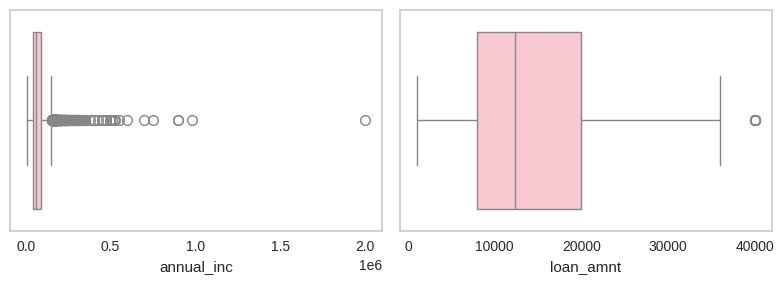

In [ ]:
plt.figure(figsize=(8,3))

for i in range(0, len(df_check_outliers.columns)):
    plt.subplot(1,len(df_check_outliers.columns),i+1)
    sns.boxplot(x=df_check_outliers[df_check_outliers.columns[i]], color='pink')
    plt.tight_layout()

1. *The boxplot indicates that the majority of the `annual incomes` are concentrated at lower values, with a significant number of high-value outliers extending up to approximately $2,000,000.*

2. *Most `loan amounts` are between 5,000 and 20,000, with a few outliers extending up to approximately 40,000.*

#### 2.4.1 Handle Outliers

In [ ]:
# Function for identifying and eliminating outliers from data
def remove_outliers(data,columns):
    data_check = data[columns]

    for i in data_check.columns:
        Q1 = data_check[i].quantile(0.25)
        Q3 = data_check[i].quantile(0.75)
        IQR = Q3 - Q1

        data = data[~((data_check[i] < (Q1 - 1.5 * IQR)) | (data_check[i] > (Q3 + 1.5 * IQR)))]

    return data

In [ ]:
# Remove Outliers
df_clean = remove_outliers(df_merged,["annual_inc","loan_amnt"])
df_clean

,id,emp_length,annual_inc,income_expense_ratio,verification_status,home_ownership,state_code,region,grade,emp_experience,loan_status,purpose,application_type,issue_month,term,loan_amnt,installment,int_rate
0,148271,2 years,45000.0,34.19,Not Verified,MORTGAGE,KY,South,B,Rookies,Fully Paid,credit_card,INDIVIDUAL,2015-08-01,36 months,2000.0,69.93,15.61
1,218833,3 years,80000.0,22.43,Not Verified,MORTGAGE,ND,Midwest,B,Mid-Level,Fully Paid,credit_card,INDIVIDUAL,2010-04-01,36 months,15000.0,506.18,13.11
2,383111,3 years,50150.0,10.24,Not Verified,MORTGAGE,NE,Midwest,A,Mid-Level,Fully Paid,debt_consolidation,INDIVIDUAL,2013-06-01,36 months,10000.0,328.06,11.14
3,167468,8 years,79000.0,14.64,Verified,MORTGAGE,OR,West,A,Senior,Fully Paid,credit_card,INDIVIDUAL,2014-01-01,36 months,12000.0,398.52,11.99
4,337956,< 1 year,60000.0,25.42,Source Verified,RENT,WA,West,C,Rookies,Charged Off,debt_consolidation,INDIVIDUAL,2015-04-01,60 months,22750.0,596.68,19.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8467,54050,8 years,60000.0,13.84,Not Verified,RENT,KS,Midwest,B,Senior,Charged Off,credit_card,INDIVIDUAL,2014-01-01,36 months,8400.0,289.02,14.47
8468,87157,10+ years,110000.0,13.12,Verified,MORTGAGE,CT,Northeast,B,Senior,Charged Off,vacation,INDIVIDUAL,2015-10-01,36 months,7200.0,241.53,12.69
8469,289726,10+ years,40000.0,19.14,Source Verified,MORTGAGE,AZ,West,B,Senior,Fully Paid,debt_consolidation,INDIVIDUAL,2014-01-01,60 months,11600.0,288.23,16.99
8470,91448,9 years,55000.0,18.72,Not Verified,RENT,ND,Midwest,B,Senior,Fully Paid,debt_consolidation,INDIVIDUAL,2013-05-01,36 months,12000.0,436.79,18.49


*8472 - 8112 = There is 300 Outlier*
*And we've decided to remove it because it can ruin the K-means segmentation*

*We will recheck the boxplots for the `annual_inc` and `loan_amnt` columns after removing outliers.*

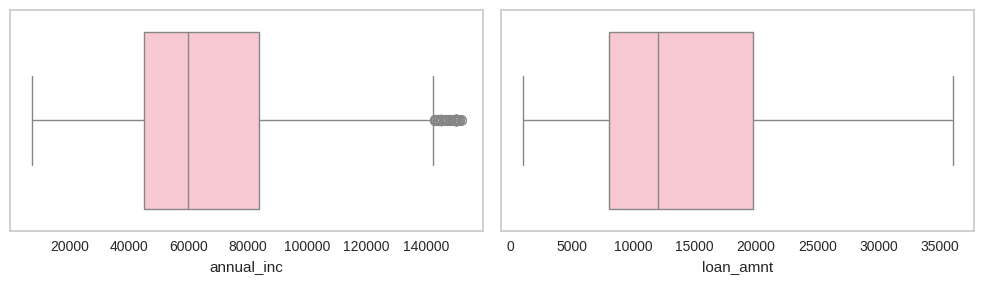

In [ ]:
df_check_outliers = df_clean[["annual_inc","loan_amnt"]]

plt.figure(figsize=(10,3))

for i in range(0, len(df_check_outliers.columns)):
    plt.subplot(1,len(df_check_outliers.columns),i+1)
    sns.boxplot(x=df_check_outliers[df_check_outliers.columns[i]], color='pink')
    plt.tight_layout()

1. *The `annual income` distribution is more concentrated, with most values falling between approximately 40,000 and 80,000, suggesting a more uniform income range for the majority of the dataset. The remaining outliers likely represent legitimate extreme values in the dataset, such as high-income earners, that fall outside the typical range but are not considered statistical errors or anomalies warranting removal.*

2. *The boxplot shows that most `loan amounts` are concentrated between approximately 5,000 and 20,000, with a median around 10,000, indicating a relatively narrow range for typical loan values after outlier removal.*

## 3. Exploratory Data Analysis

In [ ]:
df_eda = df_clean.copy()
df_eda.head()

,id,emp_length,annual_inc,income_expense_ratio,verification_status,home_ownership,state_code,region,grade,emp_experience,loan_status,purpose,application_type,issue_month,term,loan_amnt,installment,int_rate
0,148271,2 years,45000.0,34.19,Not Verified,MORTGAGE,KY,South,B,Rookies,Fully Paid,credit_card,INDIVIDUAL,2015-08-01,36 months,2000.0,69.93,15.61
1,218833,3 years,80000.0,22.43,Not Verified,MORTGAGE,ND,Midwest,B,Mid-Level,Fully Paid,credit_card,INDIVIDUAL,2010-04-01,36 months,15000.0,506.18,13.11
2,383111,3 years,50150.0,10.24,Not Verified,MORTGAGE,NE,Midwest,A,Mid-Level,Fully Paid,debt_consolidation,INDIVIDUAL,2013-06-01,36 months,10000.0,328.06,11.14
3,167468,8 years,79000.0,14.64,Verified,MORTGAGE,OR,West,A,Senior,Fully Paid,credit_card,INDIVIDUAL,2014-01-01,36 months,12000.0,398.52,11.99
4,337956,< 1 year,60000.0,25.42,Source Verified,RENT,WA,West,C,Rookies,Charged Off,debt_consolidation,INDIVIDUAL,2015-04-01,60 months,22750.0,596.68,19.52


In [ ]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8112 entries, 0 to 8471
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    8112 non-null   object        
 1   emp_length            8112 non-null   object        
 2   annual_inc            8112 non-null   float64       
 3   income_expense_ratio  8112 non-null   float64       
 4   verification_status   8112 non-null   object        
 5   home_ownership        8112 non-null   object        
 6   state_code            8112 non-null   object        
 7   region                8112 non-null   object        
 8   grade                 8112 non-null   object        
 9   emp_experience        8112 non-null   object        
 10  loan_status           8112 non-null   object        
 11  purpose               8112 non-null   object        
 12  application_type      8112 non-null   object        
 13  issue_month           8

### 3.1 Desc Statistics

#### 3.1.1 numerical variables

In [ ]:
numerical = df_eda.select_dtypes(include = ['number'])

pd.set_option('display.float_format', '{:.2f}'.format) # 2 angka dibelakang koma

desc_num = numerical.describe()

desc_num.loc['kurtosis'] = numerical.kurt()
desc_num.loc['skew'] = numerical.skew()

desc_num



,annual_inc,income_expense_ratio,loan_amnt,installment,int_rate
count,8112.00,8112.00,8112.00,8112.00,8112.00
mean,66686.33,18.30,14167.46,430.43,14.28
std,28914.77,8.21,8098.45,239.70,4.56
min,7261.00,0.00,1000.00,31.11,5.32
25%,45000.00,12.24,8000.00,259.79,10.99
50%,60000.00,18.04,12000.00,380.84,13.99
75%,84000.00,23.98,19750.00,558.32,17.27
max,152000.00,59.26,36000.00,1451.14,29.99
kurtosis,0.10,-0.49,-0.04,0.86,-0.23
skew,0.78,0.16,0.75,0.96,0.35


*The dataset contains 8,112 records with the following insights:*

1. *The average `annual income` is approximately 66,686 with a wide range from 7,261 to 152,000.*
2. *The `income expense ratio` averages 18.3, indicating the percentage of income spent.*
3. *`Loan amounts` range from 1,000 to 36,000, with a mean of 14,167.*
4. *`Installments` have an average of 430, with a significant range up to 1,451.*
5. *`Interest rates` average 14.28%, with a minimum of 5.32% and a maximum of 29.99%.*
6. *The `skewness` and `kurtosis` values suggest slight asymmetry and distribution shapes close to normal for most variables.*

#### 3.1.2 categorical variables

In [ ]:
categorical = df_eda.select_dtypes(exclude = ['number','datetime'])
categorical.describe()

,id,emp_length,verification_status,home_ownership,state_code,region,grade,emp_experience,loan_status,purpose,application_type,term
count,8112,8112,8112,8112,8112,8112,8112,8112,8112,8112,8112,8112
unique,8112,11,3,3,51,4,3,3,2,14,3,2
top,148271,10+ years,Source Verified,MORTGAGE,LA,South,B,Senior,Fully Paid,debt_consolidation,INDIVIDUAL,36 months
freq,1,2689,2847,3890,180,2763,3677,3910,4941,4952,8100,5825


*The dataset contains 8,112 unique records of loan applicants with the following insights:*

1. *`Employment length` varies, with "10+ years" being the most common (2,689 instances).*
2. *Source Verified is the top `verification status` (2,847 instances).*
3. *Most borrowers have a mortgage (3,890 instances).*
4. *The `state code` "LA" (Louisiana) and `region` "South" are the most frequent (180 and 2,763 instances, respectively).*
5. *`Grade` "B" is the most common loan `grade` (3,677 instances).*
6. *Borrowers with senior `employment experience` are the majority (3,910 instances).*
7. *The majority of loans are fully paid (4,941 instances).*
8. *The primary loan `purpose` is debt consolidation (4,952 instances).*
9. *Most applications are individual (8,100 instances).*
10. *The majority of loans have a `term` of 36 months (5,825 instances).*

#### 3.1.3 date variable

In [ ]:
df_date = df_eda.select_dtypes(include = ['datetime'])
df_date.describe()

,issue_month
count,8112
mean,2014-02-11 01:11:00.355029504
min,2007-09-01 00:00:00
25%,2013-05-01 00:00:00
50%,2014-04-01 00:00:00
75%,2015-03-01 00:00:00
max,2016-12-01 00:00:00


the dataset contain 8112 loan applicant records with issue month ranging from september 2007 to des 2016. the average issue month is feb 11, 2014. the median issue month is april 2014 with 25% of loans issued before may 2013 and 75% before maret 2015

### 3.2 Total Number of User

How many users do we have in the data?






In [ ]:
df_eda['id'].count()

8112

In [ ]:
print('We have ', df_eda['id'].count(), 'users that taking loan from 2007 to 2016')

We have  8112 users that taking loan from 2007 to 2016


### 3.3 Distribution of users by loan status

How many users in each category of loan status?

In [ ]:
loan_status = df_eda.groupby('loan_status')['id'].count()
loan_status = loan_status.reset_index(name='number_of_users')
loan_status

,loan_status,number_of_users
0,Charged Off,3171
1,Fully Paid,4941


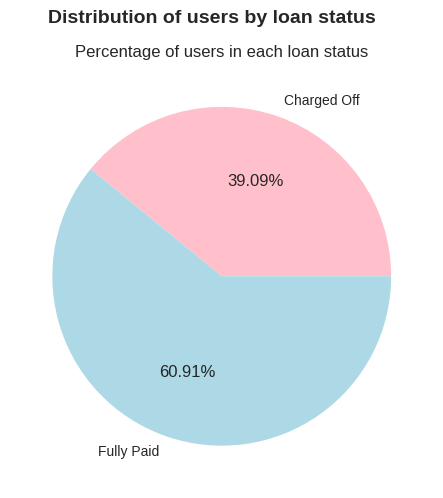

In [ ]:
# plot
plt.pie(loan_status['number_of_users'], labels=loan_status['loan_status'], autopct='%.2f%%', colors=['pink','lightblue'])

# add title
plt.suptitle('Distribution of users by loan status',fontweight = 'bold',fontsize=14)
plt.title('Percentage of users in each loan status', fontsize=12)

plt.show()

1. charged off: there 3171 (39.09%) users with charged-off loans
2. Fully Paid: there 4941 (60.91%) users with fully paid loans

### 3.4 Loan Purpose

What is the common purpose for a loan?

In [ ]:
purpose = df_eda.groupby('purpose')['id'].count()
purpose = purpose.reset_index(name='number_of_users')
purpose

,purpose,number_of_users
0,car,65
1,credit_card,1630
2,debt_consolidation,4952
3,educational,3
4,home_improvement,426
5,house,52
6,major_purchase,166
7,medical,90
8,moving,66
9,other,431


In [ ]:
# fig = plt.figure(figsize =(15, 5))    #To create the canvas, figsize is showing size in inches (x,y)

# K = purpose.copy()

# K.sort_values('number_of_users', ascending=True, inplace=True) #Sort the values descendingly
# x = K['purpose']    #assign the x
# y = K['number_of_users']         #assign the y

# plt.barh(x, y)  #Create the horizontal bar chart

# #To show the data labels
# for i, v in enumerate(y):                           #enumerate add numeric besides the data, example = (0, ‘value’)
#     vmil = round(v)                                 #round the y
#     plt.text(v, i, str(vmil), fontweight='bold')    #add text plt.text(x,y,s,fontweight = '')

# plt.show()

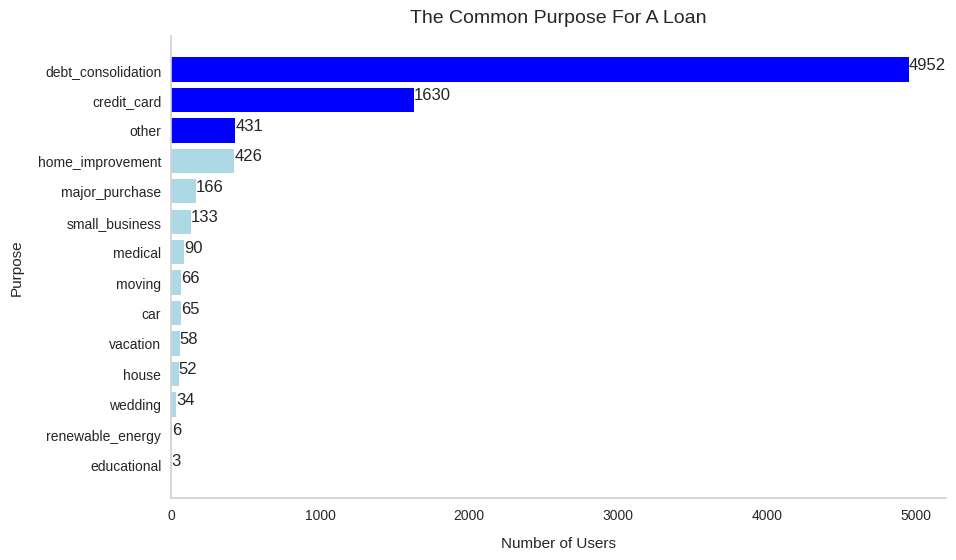

In [ ]:
K = purpose.copy()

K.sort_values('number_of_users', ascending=True, inplace=True)
x = K['purpose']
y = K['number_of_users']

# Colouring bar
def set_color(series, max_color = 'blue', other_color = 'lightblue'):
  max_val = series.max()
  second_max_val = series.nlargest(2).iloc[1]  # Get the second largest value
  third_max_val = series.nlargest(3).iloc[2]
  pal = []

  for item in series:
    if item == max_val:
      pal.append(max_color)
    elif item == second_max_val:
      pal.append(max_color)
    elif item == third_max_val:
      pal.append(max_color)
    else:
      pal.append(other_color)
  return pal

# Create the horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))  # Create a figure and axes
ax.barh(x, y, color = set_color(y))

# To show the data labels
for i, val in enumerate(y):
    plt.text(val, i, val) # x coordinate, y coordinate, text

# --------------------------------------------------------
# alternative
# value_bar = ax.barh(x, y, color = set_color(y))

# # To show the data labels
# plt.bar_label(value_bar, padding=2)
# --------------------------------------------------------

# Modify the spines
ax.spines['left'].set_color('lightgray')
ax.spines['bottom'].set_color('lightgray')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

# # Labels, title, and despine settings
plt.xlabel('Number of Users', labelpad=10)
plt.ylabel('Purpose', labelpad=10)
plt.title("The Common Purpose For A Loan", fontsize=14, pad=10)
sns.despine(top=True, right=True, left=False, bottom=False)

plt.show()

Here we are using pareto chart

In [ ]:
purpose.head()

,purpose,number_of_users
0,car,65
1,credit_card,1630
2,debt_consolidation,4952
3,educational,3
4,home_improvement,426


sorting before calculating cumulative percentage

In [ ]:
purpose = purpose.sort_values('number_of_users', ascending=False)
purpose

,purpose,number_of_users
2,debt_consolidation,4952
1,credit_card,1630
9,other,431
4,home_improvement,426
6,major_purchase,166
11,small_business,133
7,medical,90
8,moving,66
0,car,65
12,vacation,58


calculating cumulative percentage

In [ ]:
purpose['cum'] = purpose['number_of_users'].cumsum()
purpose['cum_percentage'] = round(purpose['number_of_users'].cumsum()/purpose['number_of_users'].sum()*100,2)
purpose

,purpose,number_of_users,cum,cum_percentage
2,debt_consolidation,4952,4952,61.05
1,credit_card,1630,6582,81.14
9,other,431,7013,86.45
4,home_improvement,426,7439,91.70
6,major_purchase,166,7605,93.75
11,small_business,133,7738,95.39
7,medical,90,7828,96.50
8,moving,66,7894,97.31
0,car,65,7959,98.11
12,vacation,58,8017,98.83


now we create the pareto chart

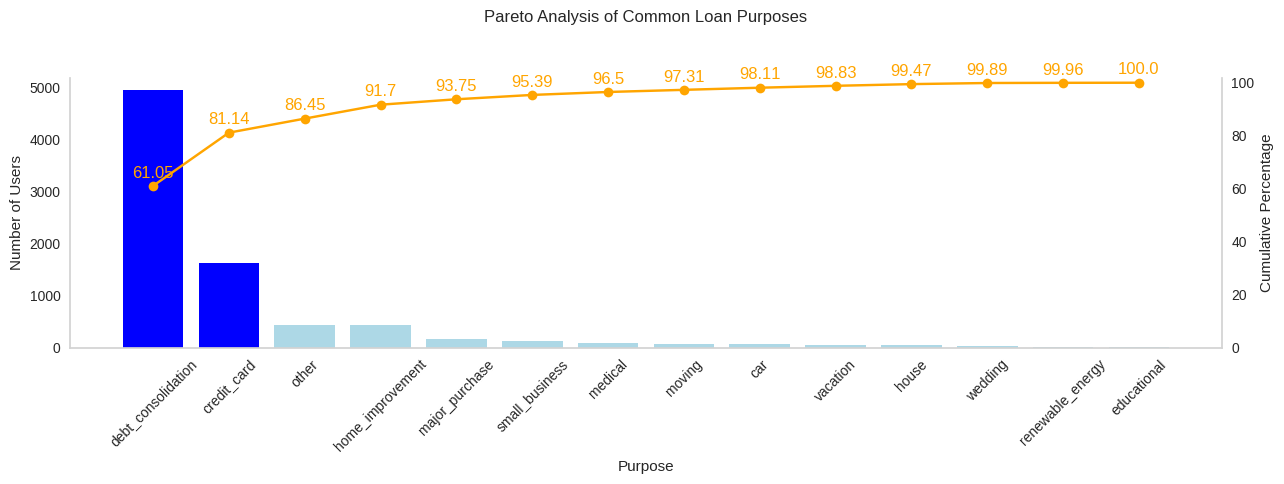

In [ ]:
x = purpose['purpose']
y_bar = purpose['number_of_users']
y_line = purpose['cum_percentage']

# Colouring bar
def set_color(series, max_color = 'blue', other_color = 'lightblue'):
  max_val = series.max()
  second_max_val = series.nlargest(2).iloc[1]  # Get the second largest value
  pal = []

  for item in series:
    if item == max_val:
      pal.append(max_color)
    elif item == second_max_val:
      pal.append(max_color)
    else:
      pal.append(other_color)
  return pal

# Create the bar chart
fig, ax = plt.subplots(figsize=(13, 5))  # Create a figure and axes
ax.bar(x, y_bar, color = set_color(y_bar))

# Rotate x-axis labels for readability
plt.xticks(rotation = 45)

# Line chart (twin axis)
ax2 = ax.twinx()                                   # To create combo chart, create twin axis of y, by sharing x axis
ax2.plot(x,y_line, marker = 'o', color = 'orange')   # To create the line chart
ax2.set_ylim(ymin=0)                               # To make the line chart start at 0

# To create the data labels
for i, val in enumerate(y_line):
    plt.text(i, val+2, val, color='orange', ha='center', va='bottom') # x coordinate, y coordinate, text

# Modify the spines
ax.spines['left'].set_color('lightgray')
ax.spines['bottom'].set_color('lightgray')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax2.spines['left'].set_color('none')
ax2.spines['bottom'].set_color('none')
ax2.spines['top'].set_color('none')
ax2.spines['right'].set_color('lightgray')

# Customize labels and title
plt.title("Pareto Analysis of Common Loan Purposes", pad=40)
ax.set_xlabel("Purpose")
ax.set_ylabel("Number of Users")  # Label for line chart
ax2.set_ylabel("Cumulative Percentage")  # Label for line chart

# Display the chart
plt.tight_layout()
plt.show()

*The Pareto analysis reveals that the majority of loans are concentrated in a few primary purposes, aligning with the Pareto principle (80/20 rule) which states that roughly 80% of effects come from 20% of causes. Specifically, `debt consolidation` and `credit card` purposes account for over 81% of all loans, with `debt consolidation` alone representing 61.05%. This indicates that these two categories are the dominant reasons for loan applications.*

### 3.5 number of loan applicants by region

How many users applied for loans based on region?


In [ ]:
region = df_eda.groupby('region')['id'].count()
region = region.reset_index(name = 'number_of_users')
region

,region,number_of_users
0,Midwest,1912
1,Northeast,1409
2,South,2763
3,West,2028


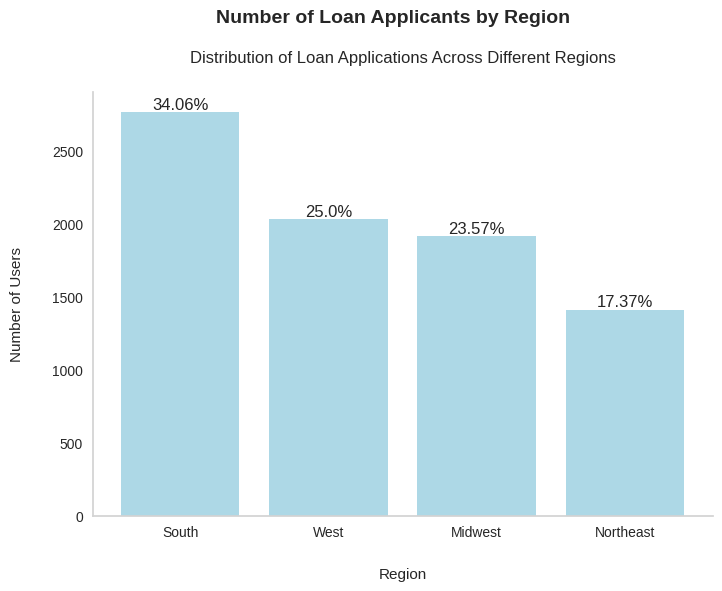

In [ ]:
K = region.copy()

K.sort_values('number_of_users', ascending=False, inplace=True)
x = K['region']
y = K['number_of_users']

# Create the bar chart
fig, ax = plt.subplots()  # Create a figure and axes
ax.bar(x, y, color='lightblue')

# Calculate total numer of users
total = sum(y)

# Add the data labels
for i, val in enumerate(y):
    plt.text(i, val, "{}%".format(round(val/total*100,2)), ha='center', va='bottom') # x coordinate, y coordinate, text

# Modify the spines
ax.spines['left'].set_color('lightgray')
ax.spines['bottom'].set_color('lightgray')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

# Labels, title, and despine settings
plt.xlabel('Region', labelpad=20)
plt.ylabel('Number of Users', labelpad=20)
plt.suptitle('Number of Loan Applicants by Region', fontweight='bold', fontsize=14, y=1.03)
plt.title('Distribution of Loan Applications Across Different Regions', fontsize=12, y=1.05)

plt.show()

the distribution of loan applicant accross different regions shows that south has the highest number of applicant with 2763 (34.06%) users

### 3.6 monthly trend analysis of issued loans

#### 3.6.1 by number of loans

Is there any trend on issued loans, monthly?

  issue_month  number_of_loans
0  2007-09-01                1
1  2007-11-01                1
2  2007-12-01                1
3  2008-01-01                3
4  2008-02-01                1


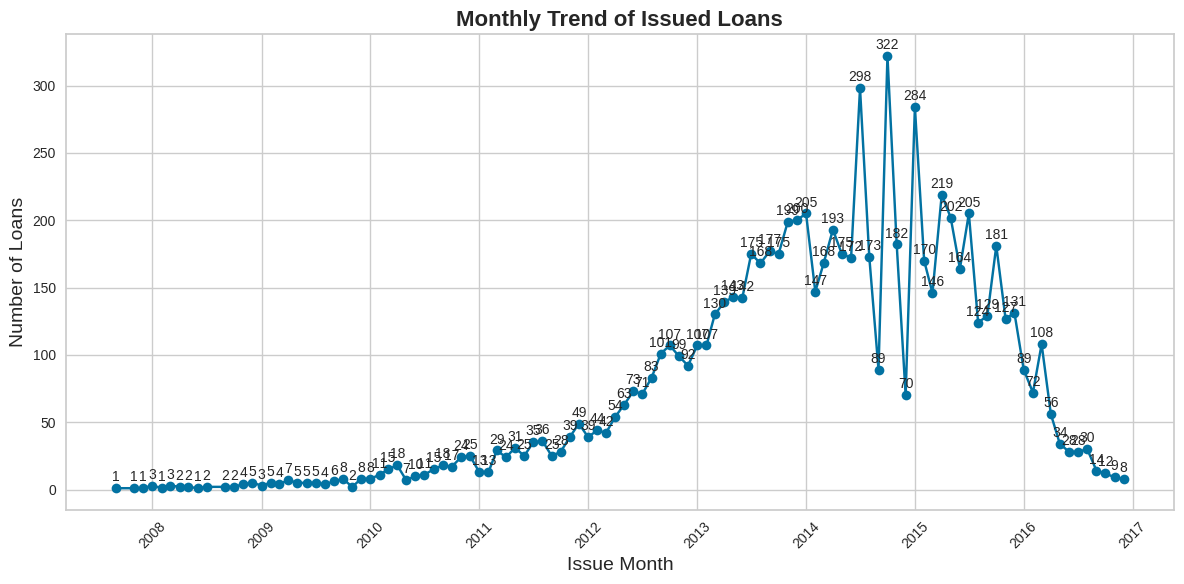

Total loans issued: 8112
Peak month for loans: 2014-10 with 322 loans

The trend analysis of issued loans on a monthly basis reveals several key insights:
1. The total number of loans issued over the period analyzed is 8112.
2. The peak month for loan issuance is 2014-10, with a total of 322 loans issued.
3. The visualization shows fluctuations in loan issuance, with certain periods experiencing higher volumes than others. This trend can help in understanding the seasonal patterns and economic factors influencing loan demands.



In [ ]:
# Group by month and count the number of issued loans
monthly_trend = df_eda.groupby(df_eda['issue_month'].dt.to_period('M')).size().reset_index(name='number_of_loans')

# Convert 'issue_month' back to datetime for plotting
monthly_trend['issue_month'] = monthly_trend['issue_month'].dt.to_timestamp()

# Display the first 5 rows of the summary table
print(monthly_trend.head())

# Plot the monthly trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_trend['issue_month'], monthly_trend['number_of_loans'], marker='o', linestyle='-', color='b')
plt.title('Monthly Trend of Issued Loans', fontsize=16, fontweight='bold')
plt.xlabel('Issue Month', fontsize=14)
plt.ylabel('Number of Loans', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)

# Add numbers to the line chart
for i, value in enumerate(monthly_trend['number_of_loans']):
    plt.annotate(
        str(value),
        (monthly_trend['issue_month'][i], monthly_trend['number_of_loans'][i]),
        textcoords="offset points",
        xytext=(0, 5),
        ha='center',
        fontsize=10
    )

plt.tight_layout()
plt.show()

# Insight
total_loans = monthly_trend['number_of_loans'].sum()
peak_month = monthly_trend.loc[monthly_trend['number_of_loans'].idxmax()]['issue_month'].strftime('%Y-%m')
peak_loans = monthly_trend['number_of_loans'].max()

print(f"Total loans issued: {total_loans}")
print(f"Peak month for loans: {peak_month} with {peak_loans} loans")

# Insight
print(
f"""
The trend analysis of issued loans on a monthly basis reveals several key insights:
1. The total number of loans issued over the period analyzed is {total_loans}.
2. The peak month for loan issuance is {peak_month}, with a total of {peak_loans} loans issued.
3. The visualization shows fluctuations in loan issuance, with certain periods experiencing higher volumes than others. This trend can help in understanding the seasonal patterns and economic factors influencing loan demands.
"""
)

##### versi tidak ada nomor di line

In [ ]:
# # Group by month and count the number of issued loans
# monthly_trend = df_eda.groupby(df_eda['issue_month'].dt.to_period('M')).size().reset_index(name='number_of_loans')

# # Convert 'issue_month' back to datetime for plotting
# monthly_trend['issue_month'] = monthly_trend['issue_month'].dt.to_timestamp()

# # Display the first 5 rows of the summary table
# print(monthly_trend.head())

# # Plot the monthly trend
# plt.figure(figsize=(12, 6))
# plt.plot(monthly_trend['issue_month'], monthly_trend['number_of_loans'], marker='o', linestyle='-', color='b')
# plt.title('Monthly Trend of Issued Loans', fontsize=16, fontweight='bold')
# plt.xlabel('Issue Month', fontsize=14)
# plt.ylabel('Number of Loans', fontsize=14)
# plt.grid(True)
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

# # Insight
# total_loans = monthly_trend['number_of_loans'].sum()
# peak_month = monthly_trend.loc[monthly_trend['number_of_loans'].idxmax()]['issue_month'].strftime('%Y-%m')
# peak_loans = monthly_trend['number_of_loans'].max()

# print(f"Total loans issued: {total_loans}")
# print(f"Peak month for loans: {peak_month} with {peak_loans} loans")

# # Insight
# print(
# f"""
# The trend analysis of issued loans on a monthly basis reveals several key insights:
# 1. The total number of loans issued over the period analyzed is {total_loans}.
# 2. The peak month for loan issuance is {peak_month}, with a total of {peak_loans} loans issued.
# 3. The visualization shows fluctuations in loan issuance, with certain periods experiencing higher volumes than others. This trend can help in understanding the seasonal patterns and economic factors influencing loan demands.
# """
# )

#### 3.6.2 by total loan amount

  issue_month  total_loan_amount
0  2007-09-01            5000.00
1  2007-11-01           12000.00
2  2007-12-01            6500.00
3  2008-01-01           23000.00
4  2008-02-01            7000.00


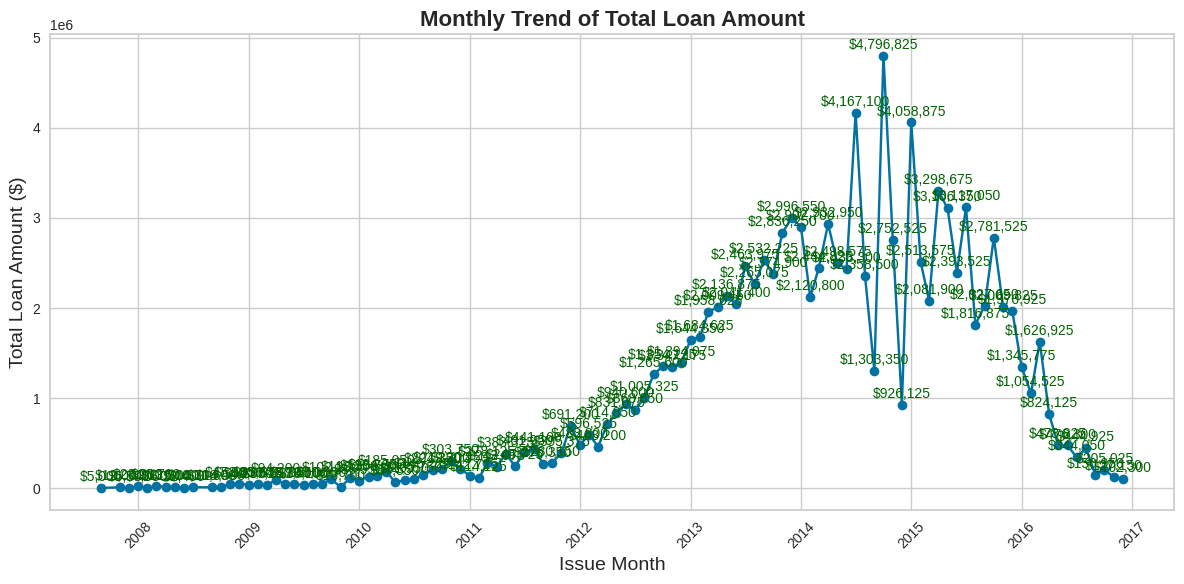

Total loan amount issued: $114,926,475.00
Peak month for loan amount: 2014-10 with $4,796,825.00

The trend analysis of total loan amounts issued on a monthly basis reveals several key insights:
1. The total loan amount issued over the period analyzed is $114,926,475.00.
2. The peak month for loan amount issuance is 2014-10, with a total of $4,796,825.00 issued.
3. The visualization shows fluctuations in total loan amounts issued, with certain periods experiencing higher volumes than others. This trend can help in understanding the seasonal patterns and economic factors influencing not just the number of loans, but also the total monetary value of loans issued.
4. Analyzing the total loan amount provides a more comprehensive view of the lending activity, as it takes into account both the number of loans and their sizes.
5. By comparing this trend with the previous analysis of loan counts, we can identify if there are months where fewer but larger loans were issued, or vice versa.



In [ ]:
# Group by month and calculate the sum of loan amounts
monthly_trend = df_eda.groupby(df_eda['issue_month'].dt.to_period('M'))['loan_amnt'].sum().reset_index(name='total_loan_amount')

# Convert 'issue_month' back to datetime for plotting
monthly_trend['issue_month'] = monthly_trend['issue_month'].dt.to_timestamp()

# Display the first 5 rows of the summary table
print(monthly_trend.head())

# Plot the monthly trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_trend['issue_month'], monthly_trend['total_loan_amount'], marker='o', linestyle='-', color='b')
plt.title('Monthly Trend of Total Loan Amount', fontsize=16, fontweight='bold')
plt.xlabel('Issue Month', fontsize=14)
plt.ylabel('Total Loan Amount ($)', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)

# Add total loan amounts to the line chart
for i, value in enumerate(monthly_trend['total_loan_amount']):
    plt.annotate(
        f"${value:,.0f}",  # Format value as currency with no decimal places
        (monthly_trend['issue_month'][i], monthly_trend['total_loan_amount'][i]),
        textcoords="offset points",
        xytext=(0, 5),
        ha='center',
        fontsize=10,
        color='darkgreen'
    )

plt.tight_layout()
plt.show()



# Insight
total_loan_amount = monthly_trend['total_loan_amount'].sum()
peak_month = monthly_trend.loc[monthly_trend['total_loan_amount'].idxmax()]['issue_month'].strftime('%Y-%m')
peak_loan_amount = monthly_trend['total_loan_amount'].max()

print(f"Total loan amount issued: ${total_loan_amount:,.2f}")
print(f"Peak month for loan amount: {peak_month} with ${peak_loan_amount:,.2f}")

# Insight
print(
f"""
The trend analysis of total loan amounts issued on a monthly basis reveals several key insights:
1. The total loan amount issued over the period analyzed is ${total_loan_amount:,.2f}.
2. The peak month for loan amount issuance is {peak_month}, with a total of ${peak_loan_amount:,.2f} issued.
3. The visualization shows fluctuations in total loan amounts issued, with certain periods experiencing higher volumes than others. This trend can help in understanding the seasonal patterns and economic factors influencing not just the number of loans, but also the total monetary value of loans issued.
4. Analyzing the total loan amount provides a more comprehensive view of the lending activity, as it takes into account both the number of loans and their sizes.
5. By comparing this trend with the previous analysis of loan counts, we can identify if there are months where fewer but larger loans were issued, or vice versa.
"""
)

##### versi tidak ada nomor di line

In [ ]:
# # Group by month and calculate the sum of loan amounts
# monthly_trend = df_eda.groupby(df_eda['issue_month'].dt.to_period('M'))['loan_amnt'].sum().reset_index(name='total_loan_amount')

# # Convert 'issue_month' back to datetime for plotting
# monthly_trend['issue_month'] = monthly_trend['issue_month'].dt.to_timestamp()

# # Display the first 5 rows of the summary table
# print(monthly_trend.head())

# # Plot the monthly trend
# plt.figure(figsize=(12, 6))
# plt.plot(monthly_trend['issue_month'], monthly_trend['total_loan_amount'], marker='o', linestyle='-', color='b')
# plt.title('Monthly Trend of Total Loan Amount', fontsize=16, fontweight='bold')
# plt.xlabel('Issue Month', fontsize=14)
# plt.ylabel('Total Loan Amount ($)', fontsize=14)
# plt.grid(True)
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

# # Insight
# total_loan_amount = monthly_trend['total_loan_amount'].sum()
# peak_month = monthly_trend.loc[monthly_trend['total_loan_amount'].idxmax()]['issue_month'].strftime('%Y-%m')
# peak_loan_amount = monthly_trend['total_loan_amount'].max()

# print(f"Total loan amount issued: ${total_loan_amount:,.2f}")
# print(f"Peak month for loan amount: {peak_month} with ${peak_loan_amount:,.2f}")

# # Insight
# print(
# f"""
# The trend analysis of total loan amounts issued on a monthly basis reveals several key insights:
# 1. The total loan amount issued over the period analyzed is ${total_loan_amount:,.2f}.
# 2. The peak month for loan amount issuance is {peak_month}, with a total of ${peak_loan_amount:,.2f} issued.
# 3. The visualization shows fluctuations in total loan amounts issued, with certain periods experiencing higher volumes than others. This trend can help in understanding the seasonal patterns and economic factors influencing not just the number of loans, but also the total monetary value of loans issued.
# 4. Analyzing the total loan amount provides a more comprehensive view of the lending activity, as it takes into account both the number of loans and their sizes.
# 5. By comparing this trend with the previous analysis of loan counts, we can identify if there are months where fewer but larger loans were issued, or vice versa.
# """
# )

comparative insight: monthly trend total loan amount vs monthly trend of loan isseud

1. total volume:
  - total number of loan issued 8112
  - total loan amount isseud $114,926,475

2. Peak Month:
 - both anaysis show the peak month as oct 2014 (2014-10)
 - number of loan in peak month 322
 - total loan amount in peak month 4,796,825

3. average loan size
  - average loan size in oct 2014 4,796,825 / 322 = $14896
  
4. overall average loan size
  - overall loan size is 114,926,475 / 8112 = $141535

5. trend patterns
  - Both analyses show fluctuations over time, indicating similar seasonal or economic influences on both the number of loans and total loan amounts


### 3.7 monthly trend in issued loans by loan purpose

How about monthly trends on issued loans based on purpose loans in the dataset?

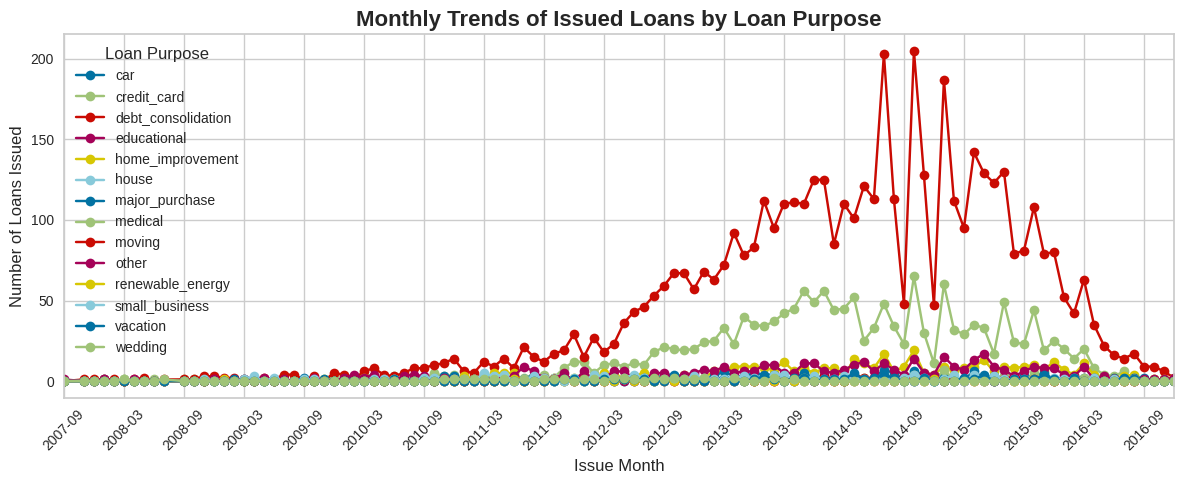


The trend analysis of issued loans on a monthly basis reveals several key insights:
1. The total number of loans issued over the period analyzed is 8112.
2. The peak month for loan issuance is 2014-10, with a total of 322 loans issued.
3. The visualization shows fluctuations in loan issuance, with certain periods experiencing higher volumes than others. This trend can help in understanding the seasonal patterns and economic factors influencing loan demands.



In [ ]:
# Grouping df_eda by loan purpose and issue month
# This step aggregates the data by the purpose of the loan and the month it was issued,
# then creates a table where the rows are the months and the columns are the loan purposes.
# The size() function counts the number of loans for each combination, filling any missing values with 0.
monthly_trends = df_eda.groupby([df_eda['issue_month'].dt.to_period('M'), 'purpose']).size().unstack(fill_value=0)

# Plotting
fig, ax = plt.subplots(figsize=(12, 5)) # Create a figure and an axis object for the plot with specified size.
monthly_trends.plot(kind='line', marker='o', ax=ax) # Plot the trends with lines and markers. Each line represents a loan purpose.
plt.title('Monthly Trends of Issued Loans by Loan Purpose', fontsize=16, fontweight='bold')
plt.xlabel('Issue Month', fontsize=12)
plt.ylabel('Number of Loans Issued', fontsize=12)
plt.legend(title='Loan Purpose', loc='upper left')
plt.grid(True)

# Adjust xticks
ax.set_xticks(pd.date_range(start=df_eda['issue_month'].min(), end=df_eda['issue_month'].max(), freq='6M')) # Set xticks to display every 6 months within the range of issue months in the dataset
ax.set_xticklabels([date.strftime('%Y-%m') for date in pd.date_range(start=df_eda['issue_month'].min(), end=df_eda['issue_month'].max(), freq='6M')], rotation=45) # Format xtick labels to show year and month, and rotate them for better readability
plt.tight_layout() # Ensure the layout is tight so that labels and titles are not cut off
plt.show()

# Insight
total_loans = df_eda['id'].count() # Calculate the total number of loans issued over the analyzed period
peak_month = monthly_trends.sum(axis=1).idxmax().strftime('%Y-%m') # Identify the peak month with the highest total loans issued and convert it to a string format
peak_loans = monthly_trends.sum(axis=1).max() # Find the maximum number of loans issued in that peak month

print(f"""
The trend analysis of issued loans on a monthly basis reveals several key insights:
1. The total number of loans issued over the period analyzed is {total_loans}.
2. The peak month for loan issuance is {peak_month}, with a total of {peak_loans} loans issued.
3. The visualization shows fluctuations in loan issuance, with certain periods experiencing higher volumes than others. This trend can help in understanding the seasonal patterns and economic factors influencing loan demands.
""")

1. The graph shows that `debt consolidation` and `credit card` are indeed the most common loan purposes, dominating the trends.

2. Significant loan activity begins around 2012, suggesting a focus on data from 2012 onwards would be more informative.

3. Narrowing the analysis to these top categories and more recent years will provide clearer trends and insights.

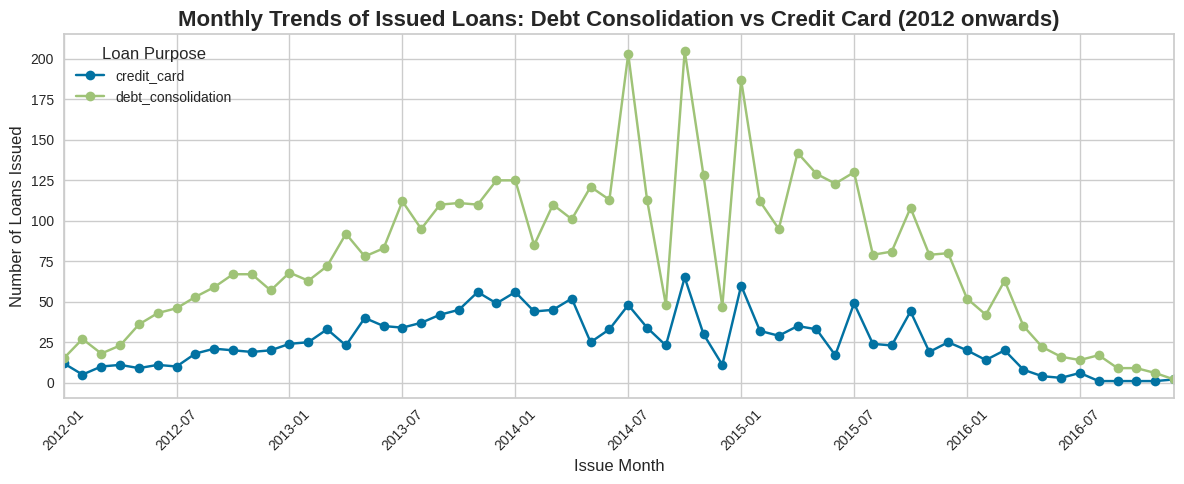


Focused trend analysis of issued loans for debt consolidation and credit card purposes from 2012 onwards:
1. Total number of loans issued in these categories since 2012: 6207
2. Peak month for loan issuance: 2014-10, with 270 loans issued
3. The graph shows clearer trends for these two major loan purposes, allowing for better analysis of their relative popularity and seasonal patterns.



In [ ]:
# Filter data from 2012 onwards and for debt consolidation and credit card purposes
df_filtered = df_eda[
    (df_eda['issue_month'].dt.year >= 2012) &
    (df_eda['purpose'].isin(['debt_consolidation', 'credit_card']))
]

# Group by loan purpose and issue month
monthly_trends = df_filtered.groupby([df_filtered['issue_month'].dt.to_period('M'), 'purpose']).size().unstack(fill_value=0)

# Plotting
fig, ax = plt.subplots(figsize=(12, 5))
monthly_trends.plot(kind='line', marker='o', ax=ax)
plt.title('Monthly Trends of Issued Loans: Debt Consolidation vs Credit Card (2012 onwards)', fontsize=16, fontweight='bold')
plt.xlabel('Issue Month', fontsize=12)
plt.ylabel('Number of Loans Issued', fontsize=12)
plt.legend(title='Loan Purpose', loc='upper left')
plt.grid(True)

# Adjust xticks
date_range = pd.date_range(start=monthly_trends.index.min().to_timestamp(), end=monthly_trends.index.max().to_timestamp(), freq='6M')
ax.set_xticks(date_range)
ax.set_xticklabels([date.strftime('%Y-%m') for date in date_range], rotation=45)
plt.tight_layout()
plt.show()

# Insights
total_loans = df_filtered['id'].count()
peak_month = monthly_trends.sum(axis=1).idxmax().strftime('%Y-%m')
peak_loans = monthly_trends.sum(axis=1).max()

print(f"""
Focused trend analysis of issued loans for debt consolidation and credit card purposes from 2012 onwards:
1. Total number of loans issued in these categories since 2012: {total_loans}
2. Peak month for loan issuance: {peak_month}, with {peak_loans} loans issued
3. The graph shows clearer trends for these two major loan purposes, allowing for better analysis of their relative popularity and seasonal patterns.
""")

1. overall trend comparison
 - debt consolidation loans consisntently outnumber credit card loands throughout the period
 - both types of loans show and overall increasing trend from 2012 to mid 2014

2. debt consolidation loans
 - Show more pronounced fluctuations, especially from mid-2014 onwards.
 - Experience sharp spikes and drops, with peaks reaching around 200 loans in some months.
 - The sudden drops and increases you noted around 2014/04 are indeed visible and continue through 2015.

3. credit card loans
 - Display a more stable trend compared to debt consolidation loans
 - Still show some volatility, but with less extreme peaks and troughs
 - The highest peaks for credit card loans reach about 60-70 loans per month.

4. recent trend
 - both loans types show a declining trend from 2015 into 2016


suggestion for improvementL
- consider analyzing reason behind the extreme trend in debt consolidation loans from mid 2014 to 2015
- investigate any external factor
- examine the overall declining trend in 2015 for bioth loan types and its potential causes.
- if possible, extend the analysis beyond 2016 if these trend continued or changed

# 4. Customer Segementation

In [ ]:
df_segmentation = df_clean.copy()
df_segmentation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8112 entries, 0 to 8471
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    8112 non-null   object        
 1   emp_length            8112 non-null   object        
 2   annual_inc            8112 non-null   float64       
 3   income_expense_ratio  8112 non-null   float64       
 4   verification_status   8112 non-null   object        
 5   home_ownership        8112 non-null   object        
 6   state_code            8112 non-null   object        
 7   region                8112 non-null   object        
 8   grade                 8112 non-null   object        
 9   emp_experience        8112 non-null   object        
 10  loan_status           8112 non-null   object        
 11  purpose               8112 non-null   object        
 12  application_type      8112 non-null   object        
 13  issue_month           8

### 4.1 Data Preprocessing

In [ ]:
df_segmentation_feature = df_segmentation[['annual_inc', 'loan_amnt']]
df_segmentation_feature

,annual_inc,loan_amnt
0,45000.00,2000.00
1,80000.00,15000.00
2,50150.00,10000.00
3,79000.00,12000.00
4,60000.00,22750.00
...,...,...
8467,60000.00,8400.00
8468,110000.00,7200.00
8469,40000.00,11600.00
8470,55000.00,12000.00


#### 4.1.1 Scaling Method Recommendation

tentukan scaling mau pake apa? (shapiro-wilk)
1. standard scaler = if p-value > 0.05 dan skewness is between -1 dan 1
2. minmax scaler = if p-value < 0.05 and skewness is between -1 dan 1
3. robust scarer = if p-value < 0.05 and skewness >1 atau kurang dari -1

In [ ]:
def determine_scaler(data, column_name):
    stat, p_value = shapiro(data[column_name])
    skewness = skew(data[column_name])

    print(f"{column_name} - Shapiro-Wilk Test: Statistic={stat}, p-value={p_value}")
    print(f"{column_name} - Skewness: {skewness}")

    if p_value > 0.05 and -1 <= skewness <= 1:
        scaler = "StandardScaler"
    elif p_value < 0.05 and -1 <= skewness <= 1:
        scaler = "MinMaxScaler"
    elif p_value < 0.05 and (skewness < -1 or skewness > 1):
        scaler = "RobustScaler"
    else:
        scaler = "RobustScaler"

    return scaler

annual_income_scaler = determine_scaler(df_segmentation, 'annual_inc')
loan_amount_scaler = determine_scaler(df_segmentation, 'loan_amnt')

print(f"Recommended Scaler for Annual Income: {annual_income_scaler}")
print(f"Recommended Scaler for Loan Amount: {loan_amount_scaler}")

annual_inc - Shapiro-Wilk Test: Statistic=0.9502380525330475, p-value=5.342822424152467e-46
annual_inc - Skewness: 0.7758707122310565
loan_amnt - Shapiro-Wilk Test: Statistic=0.9448017407605234, p-value=1.0054234055974262e-47
loan_amnt - Skewness: 0.7499931235988754
Recommended Scaler for Annual Income: MinMaxScaler
Recommended Scaler for Loan Amount: MinMaxScaler


#### 4.1.2 applying scaling method

based on shapiro-wilk, kita bakal pakai MinMaxScaler

In [ ]:
minmax_scaler = MinMaxScaler()
df_segmentation_normalized = minmax_scaler.fit_transform(df_segmentation_feature)
df_segmentation_normalized = pd.DataFrame(df_segmentation_normalized, columns=df_segmentation_feature.columns)
df_segmentation_normalized.head()

,annual_inc,loan_amnt
0,0.26,0.03
1,0.50,0.40
2,0.30,0.26
3,0.50,0.31
4,0.36,0.62


### 4.2 Determine Cluster Number

#### 4.2.1 Elbow Method

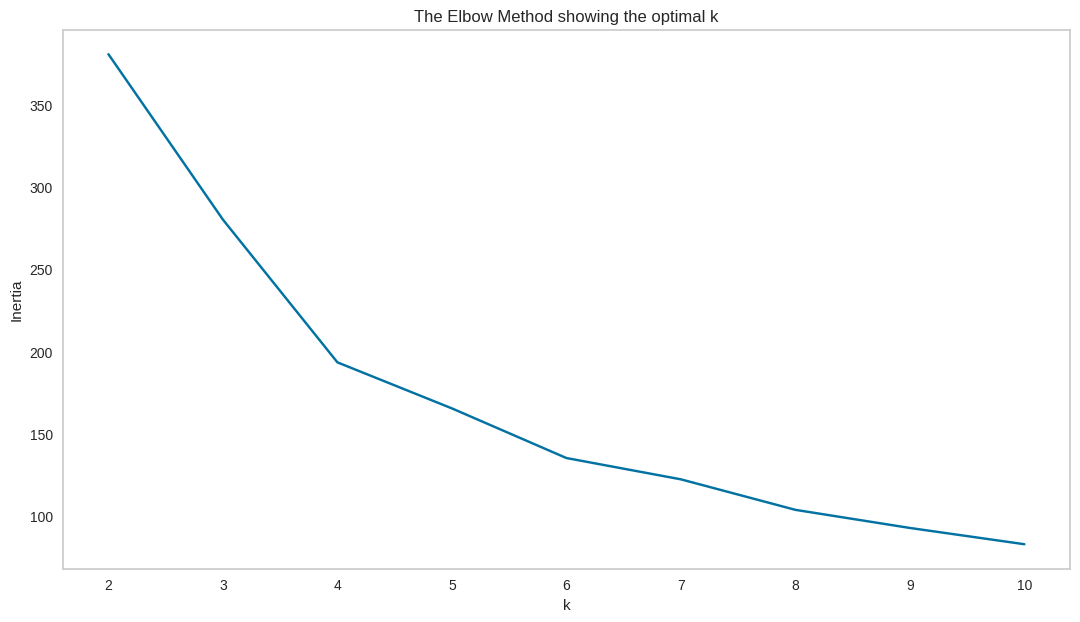

[380.7099473577761, 280.1229500853789, 193.33030645485303, 165.33794930390877, 135.15666453584413, 122.19931388308488, 103.64756801907996, 92.63229804789174, 82.74169826906807]


In [ ]:
distortions = []
K = range(2,11)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k)
    kmeanModel.fit(df_segmentation_normalized)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(13,7))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()
print(distortions)

#### 4.2.1 Silhouette Analysis

For k=2, the average silhouette score is 0.45568385527517274
For k=3, the average silhouette score is 0.36126242428611444
For k=4, the average silhouette score is 0.40386937787546495
For k=5, the average silhouette score is 0.37967853607400687
For k=6, the average silhouette score is 0.35701854466706867
For k=7, the average silhouette score is 0.3453210446237778
For k=8, the average silhouette score is 0.3466584459371869
For k=9, the average silhouette score is 0.3423209319205476
For k=10, the average silhouette score is 0.3546324453386818


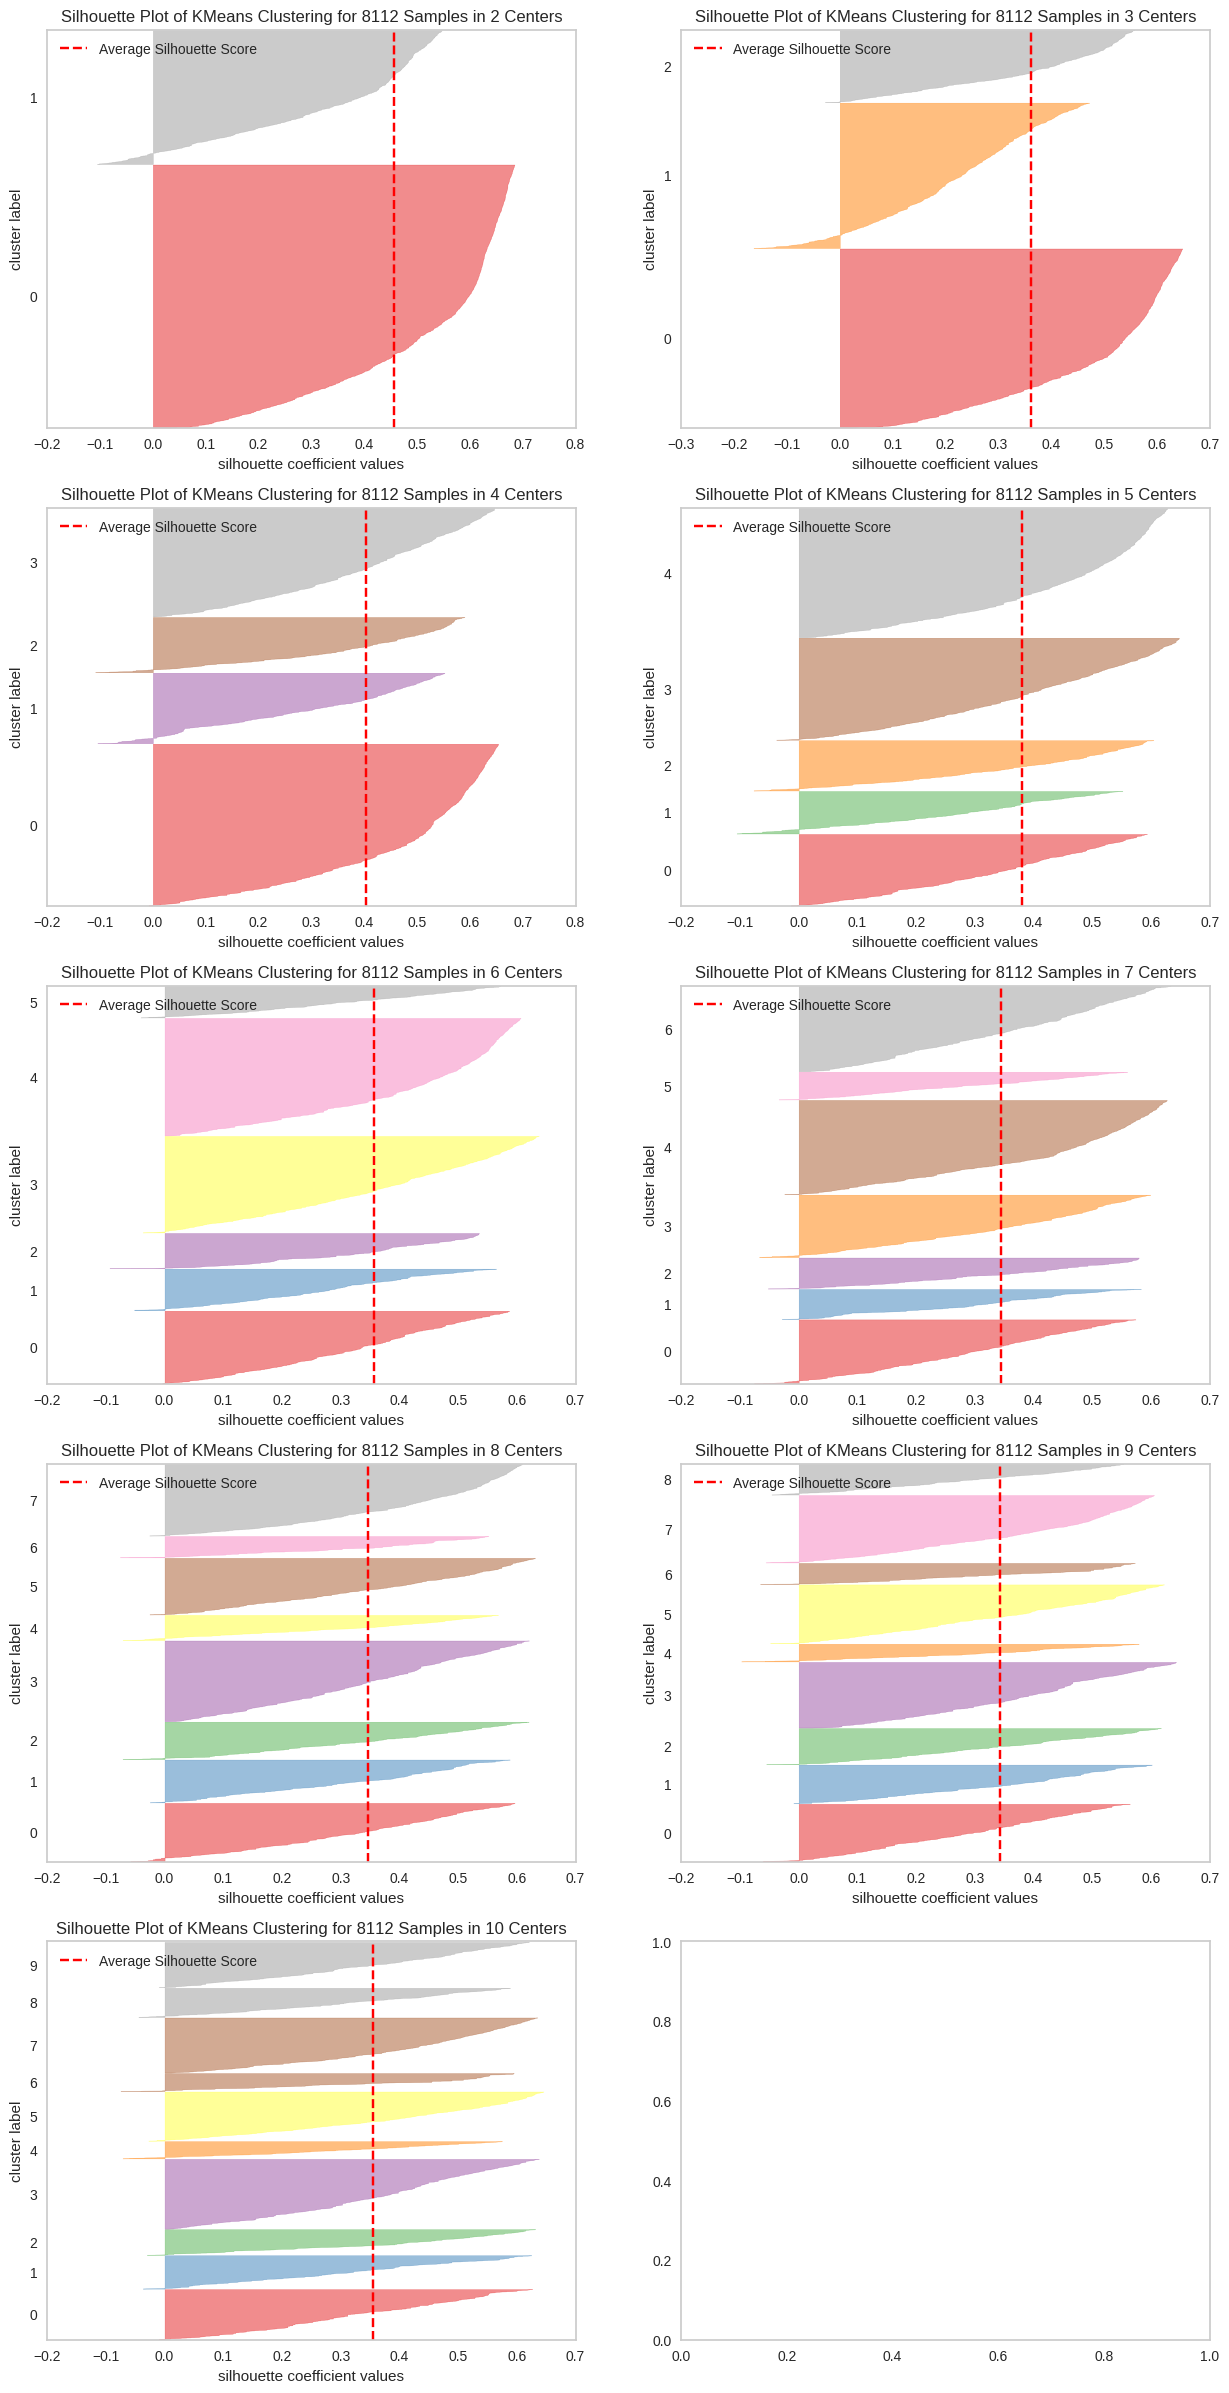

In [ ]:

K_range = range(2,11)

# Hitung banyak K yang akan diplot
banyak_K = len(K_range)

# Dibagi 2 dan dibulatkan ke atas pakai np.ceil() -- (jangan lupa ubah ke int)
n_baris = int(np.ceil(banyak_K/2))

# Define canvasnya
fig, ax = plt.subplots(n_baris, 2, figsize=(15,30))


# Karena kita akan show masing-masing plot di ax bersesuaian di subplot, kita harus tau indexnya
# Kita bisa pakai function enumerate() untuk ambil index dan elemen dari sequence tiap iterasi
for index, K in enumerate(K_range):
  kmeanModel = cluster.KMeans(n_clusters=K, random_state=42, n_init='auto')


  # Untuk memasukkan tiap chart ke indexnya di subplot, kita mending .flatten()-kan dulu ax-nya
  # Sehingga indexnya akan berupa bilangan terurut (liat appendix)
  sil = SilhouetteVisualizer(kmeanModel, is_fitted=False, ax=ax.flatten()[index])
  sil.fit(df_segmentation_normalized)
  sil.finalize()
  print(f"For k={K}, the average silhouette score is {sil.silhouette_score_}")

### 4.3 K-Means Clustering Modelling

#### 4.3.1 Kmeans clustering modelling with 4 cluster

based on Elbow Method and Silhouette Score we decide to choose 4 Clusters

In [ ]:
df4_norm = df_segmentation_normalized.copy()
df4 = df_segmentation.copy()

In [ ]:
cluster_model = cluster.KMeans(n_clusters=4, random_state=42)
cluster_model.fit(df4_norm)

KMeans(n_clusters=4, random_state=42)

In [ ]:
df4_norm['cluster'] = cluster_model.labels_
df4['cluster'] = cluster_model.labels_
df4.head()

,id,emp_length,annual_inc,income_expense_ratio,verification_status,home_ownership,state_code,region,grade,emp_experience,loan_status,purpose,application_type,issue_month,term,loan_amnt,installment,int_rate,cluster
0,148271,2 years,45000.00,34.19,Not Verified,MORTGAGE,KY,South,B,Rookies,Fully Paid,credit_card,INDIVIDUAL,2015-08-01,36 months,2000.00,69.93,15.61,0
1,218833,3 years,80000.00,22.43,Not Verified,MORTGAGE,ND,Midwest,B,Mid-Level,Fully Paid,credit_card,INDIVIDUAL,2010-04-01,36 months,15000.00,506.18,13.11,3
2,383111,3 years,50150.00,10.24,Not Verified,MORTGAGE,NE,Midwest,A,Mid-Level,Fully Paid,debt_consolidation,INDIVIDUAL,2013-06-01,36 months,10000.00,328.06,11.14,0
3,167468,8 years,79000.00,14.64,Verified,MORTGAGE,OR,West,A,Senior,Fully Paid,credit_card,INDIVIDUAL,2014-01-01,36 months,12000.00,398.52,11.99,1
4,337956,< 1 year,60000.00,25.42,Source Verified,RENT,WA,West,C,Rookies,Charged Off,debt_consolidation,INDIVIDUAL,2015-04-01,60 months,22750.00,596.68,19.52,3


In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8112 entries, 0 to 8471
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    8112 non-null   object        
 1   emp_length            8112 non-null   object        
 2   annual_inc            8112 non-null   float64       
 3   income_expense_ratio  8112 non-null   float64       
 4   verification_status   8112 non-null   object        
 5   home_ownership        8112 non-null   object        
 6   state_code            8112 non-null   object        
 7   region                8112 non-null   object        
 8   grade                 8112 non-null   object        
 9   emp_experience        8112 non-null   object        
 10  loan_status           8112 non-null   object        
 11  purpose               8112 non-null   object        
 12  application_type      8112 non-null   object        
 13  issue_month           8

a. Cluster distribution in annual income and loan amount

<Axes: xlabel='cluster', ylabel='annual_inc'>

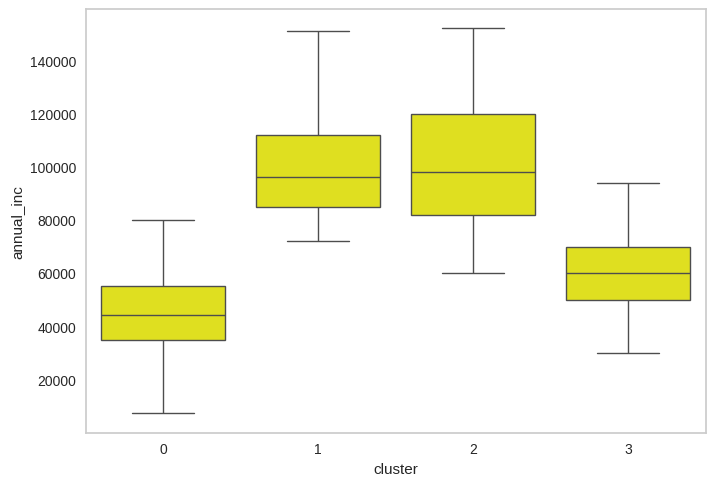

In [ ]:
sns.boxplot (data =df4, x='cluster', y='annual_inc', color='yellow')

<Axes: xlabel='cluster', ylabel='loan_amnt'>

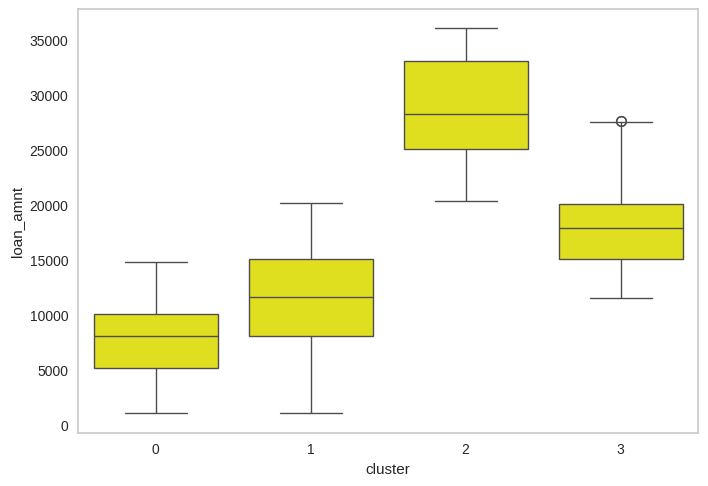

In [ ]:
sns.boxplot(data = df4, x='cluster', y ='loan_amnt', color='yellow')

<Axes: xlabel='annual_inc', ylabel='loan_amnt'>

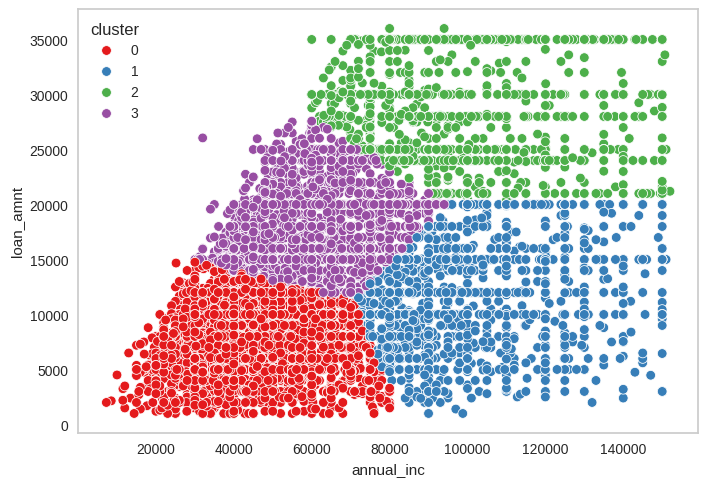

In [ ]:
sns.scatterplot(data=df4, x='annual_inc', y='loan_amnt', hue='cluster', palette='Set1')

### 4.4 Cluster Interpretation

In [ ]:
df4.groupby('cluster')[['annual_inc','loan_amnt']].agg(['count','mean','min','max','median']).T

cluster                  0         1         2        3
annual_inc count   3315.00   1445.00   1132.00  2220.00
           mean   44975.70 100365.18 100616.91 59882.45
           min     7261.00  72000.00  60000.00 30000.00
           max    80000.00 151000.00 152000.00 94000.00
           median 44200.00  96000.00  98000.00 60000.00
loan_amnt  count   3315.00   1445.00   1132.00  2220.00
           mean    7766.11  11516.54  28782.18 17999.55
           min     1000.00   1000.00  20275.00 11500.00
           max    14750.00  20125.00  36000.00 27600.00
           median  8000.00  11625.00  28225.00 17875.00

- Cluster 0: This cluster might consist of individuals with lower incomes and smaller loan amounts. They could be a target market for more affordable financial products or loan programs

- Cluster 1 and 2: This cluster likely represents individuals with high incomes and a propensity for larger loans. They might be targeted for premium financial products or investment opportunities.

- Cluster 3: These cluster might represent intermediate segments. Further analysis is needed to understand their specific needs and preferences.*

To conduct a more comprehensive analysis, we will explore the clusters further in the following columns

- Annual Income
- Loan Amount
- Loan Status
- Interest Rate
- Employer Experience
- Term
- Installment
- Grade
- Region
- Purpose

#### a. annual income

In [ ]:
df4.groupby(['cluster'], as_index = False)['annual_inc'].mean()

,cluster,annual_inc
0,0,44975.70
1,1,100365.18
2,2,100616.91
3,3,59882.45


- 0 = average annual income = 44975.70 (lowest)
- 1 = average annual income = 100365
- 2 = average annual income = 100616.91 (highest)
- 3 =  average annual income = 59882.45

#### b. loan amount

In [ ]:
df4.groupby(['cluster'], as_index = False)['loan_amnt'].mean()

,cluster,loan_amnt
0,0,7766.11
1,1,11516.54
2,2,28782.18
3,3,17999.55


- 0 = average loan amount = 7766 (lowest)
- 1 = average loan amount = 11516
- 2 = average loan amount = 28781 (highest)
- 3 = average loan amount = 17999


#### c. Loan status

In [ ]:
result = df4.groupby(['cluster', 'loan_status'])['id'].count().reset_index(name='number of users')

total_users = result.groupby('cluster')['number of users'].transform('sum')

result['percentage'] = (result['number of users'] / total_users) * 100

result

result[result['loan_status'] == 'Fully Paid']

,cluster,loan_status,number of users,percentage
1,0,Fully Paid,2008,60.57
3,1,Fully Paid,1074,74.33
5,2,Fully Paid,674,59.54
7,3,Fully Paid,1185,53.38


- 0 = Fully Paid = 60.57%
- 1 = Fully Paid = 74.33%
- 2 = Fully Paid = 59.54%
- 3 = Fully Paid = 53.38%

#### d. Intereset Rate

In [ ]:
df4.groupby(['cluster'], as_index = False)['int_rate'].mean()

,cluster,int_rate
0,0,13.81
1,1,12.74
2,2,15.64
3,3,15.30


- 0 = Average Interest Rate = 13.81%
- 1 = Average Interest Rate = 12.74%
- 2 = Average Interest Rate = 15.64%
- 3 = Average Interest Rate = 15.30%

#### e. Employer Experience

In [ ]:
df4.groupby(['cluster','emp_experience'])['id'].count().reset_index(name='number of users')

,cluster,emp_experience,number of users
0,0,Mid-Level,987
1,0,Rookies,986
2,0,Senior,1342
3,1,Mid-Level,352
4,1,Rookies,300
5,1,Senior,793
6,2,Mid-Level,266
7,2,Rookies,228
8,2,Senior,638
9,3,Mid-Level,581


highest to lowest number of users
- 0 = Senior, Mid-Level, Rookies
- 1 = Senior, Mid-Level, Rookies
- 2 = Senior, Mid-Level, Rookies
- 3 = Senior, Mid-Level, Rookies

#### f. Term

In [ ]:
# Count loans by cluster and term
result = df4.groupby(['cluster', 'term'])['id'].count().reset_index(name='number of users')

# Calculate the total users for each cluster
total_users = result.groupby('cluster')['number of users'].transform('sum')

# Calculate the percentage
result['percentage'] = (result['number of users'] / total_users) * 100

result

,cluster,term,number of users,percentage
0,0,36 months,2929,88.36
1,0,60 months,386,11.64
2,1,36 months,1194,82.63
3,1,60 months,251,17.37
4,2,36 months,525,46.38
5,2,60 months,607,53.62
6,3,36 months,1177,53.02
7,3,60 months,1043,46.98


- 0 = The majority (88.36%) is 36 months
- 1 = The majority (82.63%) is 36 months
- 2 = The majority (53.62%) is 60 months
- 3 = The majority (53.02%) is 36 months

#### g. Installment

In [ ]:
df4.groupby(['cluster'], as_index = False)['installment'].mean()

,cluster,installment
0,0,251.93
1,1,360.30
2,2,842.55
3,3,532.49


The average installment amounts, from highest to lowest, are 2,3,1,0

#### h. Grade

In [ ]:
df4.groupby(['cluster','grade'])['id'].count().reset_index(name='number of users')

,cluster,grade,number of users
0,0,A,1376
1,0,B,1619
2,0,C,320
3,1,A,785
4,1,B,555
5,1,C,105
6,2,A,327
7,2,B,504
8,2,C,301
9,3,A,729


- 0 = B,A,C
- 1 = A,B,C
- 2 = B,A,C
- 3 = B,A,C

#### i. Region

In [ ]:
df4.groupby(['cluster','region'])['id'].count().reset_index(name='number of users')

,cluster,region,number of users
0,0,Midwest,771
1,0,Northeast,572
2,0,South,1155
3,0,West,817
4,1,Midwest,344
5,1,Northeast,242
6,1,South,487
7,1,West,372
8,2,Midwest,292
9,2,Northeast,204


- 0 = South, West, Midwest, Northeast
- 1 = South, West, Midwest, Northeast
- 2 = South, Midwest, West, Northeast
- 3 = South, Midwest, West, Northeast

#### j. Purpose

In [ ]:
df_grouped = df4.groupby(['cluster','purpose'])['id'].count().reset_index(name='number of users')
df_grouped.groupby('cluster').apply(lambda x: x.nlargest(3, 'number of users')).reset_index(drop=True)

,cluster,purpose,number of users
0,0,debt_consolidation,1889
1,0,credit_card,672
2,0,other,248
3,1,debt_consolidation,814
4,1,credit_card,276
5,1,home_improvement,111
6,2,debt_consolidation,763
7,2,credit_card,222
8,2,home_improvement,65
9,3,debt_consolidation,1486


Debt consolidation is the most frequently used purpose in all clusters, followed by credit card.

### 4.5 Conclusions

Cluster 0

- annual income 44975.70
- loan amount: 7766.11
- loan status (Fully Paid): 60.57%
- Interest rate 13.86%
- Employer experience: Senior, Mid-Level, Rookies
- Term (36 Month): 88.36%
- Installment: 251.93
- Grade: B,A,C
- Region: South, West, Midwest, Northeast
- Purpose: Debt Consolidation, Credit Card


Cluster 1

- annual income 100365.18
- loan amount: 11516
- loan status (Fully Paid): 74.33%
- Interest rate 13.86%
- Employer experience: Senior, Mid-Level, Rookies
- Term (36 Month): 82.63%
- Installment: 360.30
- Grade:  A,B,C
- Region: South, West, Midwest, Northeast
- Purpose: Debt Consolidation, Credit Card


Cluster 2

- annual income 100616.91
- loan amount: 28781
- loan status (Fully Paid): 59.54%
- Interest rate 15.64%
- Employer experience: Senior, Mid-Level, Rookies
- Term (60 Month): 53.62%%
- Installment: 842.55
- Grade:  B,A,C
- Region: South, Midwest, West, Northeast
- Purpose: Debt Consolidation, Credit Card


Cluster 3

- annual income 59882.45
- loan amount: 17999.55
- loan status (Fully Paid): 53.38%
- Interest rate 15.30%
- Employer experience: Senior, Mid-Level, Rookies
- Term (36 Month): 53.02%
- Installment: 532.49
- Grade:  B,A,C
- Region: South, Midwest, West, Northeast
- Purpose: Debt Consolidation, Credit Card


### 4.6 insight and recommendation

#### 4.6.1 Identify risk profile of loan applicant to reduce financial losses from default

Based on the clustering analysis, we can categorize applicants into different risk profiles to make informed decisions:

 - Low-Mid Risk (Cluster 0):

  - **Insights**: This cluster has a moderate annual income with a loan amount representing about 17% of their income. The loan status (Fully Paid) at 60.57% indicates that while a significant portion of the applicants manage to repay their loans, some may face difficulties. The interest rate is relatively low, at 13.86%, which may appeal to this group.
  - **Recommendations**: Adopt a balanced approach for this cluster. While the risk is moderate, consider offering slightly higher interest rates compared to low-risk applicants to compensate for the increased risk. Implement moderate monitoring measures and offer targeted financial education to help improve repayment rates.

- Moderate-High Risk (Cluster 1):

 - **Insights**: This cluster features a higher annual income, with the loan amount at about 11% of income. The fully paid loan status (74.33%) shows better repayment patterns compared to Cluster 0, suggesting lower risk. Despite this, the interest rate remains the same as Cluster 0, and the loan term is mostly set for 36 months (82.63%), showing that these applicants tend to prefer shorter terms.
 - **Recommendations**: For this cluster, consider offering slightly lower interest rates due to the relatively better repayment status. While the risk is lower compared to Cluster 0, monitor applicants closely to ensure continued financial health. Offering loyalty rewards or incentives for consistent repayment might also further reduce risk.

- High Risk (Cluster 2):

 - **Insights**: This cluster has a higher annual income and significantly larger loan amounts, with loans constituting nearly 29% of their income. The loan status (Fully Paid) of 59.54% shows that this group is less likely to repay their loans compared to other clusters. The interest rate is the highest (15.64%), which reflects the elevated risk. A substantial portion of loans are taken with a longer-term (60 months), which increases the exposure.
 - **Recommendations**: For Cluster 2, it would be prudent to adopt more cautious lending strategies. Consider increasing the interest rates to account for the higher risk and implement stricter loan approval criteria. Offering financial counseling or restructuring loans for those who are struggling may improve repayment rates, but monitor this group closely to mitigate potential losses.

- Moderate Risk (Cluster 3):

 - **Insights**: This cluster has a middle-tier annual income and a loan amount comprising roughly 30% of their income. The fully paid loan status (53.38%) indicates a mix of good and bad repayment behavior. The interest rate is moderate at 15.30%, and a significant portion opts for the 36-month term (53.02%). The loan amounts are large compared to Cluster 0, but not as high as in Cluster 2.
 - **Recommendations**: For this group, it would be ideal to adopt a more tailored risk management strategy. Consider offering more flexible loan terms to reduce the burden on borrowers while maintaining an interest rate that reflects the moderate risk. Focus on improving financial education and offering personalized support to help reduce defaults.

#### 4.6.2  Optimize Loan Approval Processes to Attract Creditworthy Customers and Improve Business Outcomes

-  Interest Rates:

 a. Low Risk Cluster (Cluster 0):
  -   Recommendation: Offer slightly lower interest rates (13.86%) since this cluster has a relatively balanced loan status (60.57% fully paid), making them moderately risky. Lower interest rates would attract more creditworthy applicants while maintaining competitiveness.

 b. Moderate to High Risk Clusters (Clusters 1, 2, 3):
 - Recommendation:
Cluster 1 (Moderate Risk) has a higher fully paid loan status (74.33%), suggesting a more creditworthy group compared to Cluster 3, but still warrants a slightly higher interest rate (13.86%). This rate reflects the risk and the applicant’s income level.
Cluster 2 (High Risk) has a lower fully paid loan status (59.54%) and a higher interest rate (15.64%) to compensate for the increased risk. Increase the interest rate further for this cluster if the loan approval criteria are less strict.
Cluster 3 (Moderate Risk) with a loan status of 53.38% would also benefit from slightly higher rates (15.30%) to account for its mixed repayment patterns.


-  Loan Term:

 a. Low Risk Cluster (Cluster 0):
 - Recommendation: Most loans in this cluster have a 36-month term (88.36%), which is a favorable term. Continue offering shorter terms (36 months) for lower-risk applicants. This reduces long-term exposure and allows quicker repayment.

 b. Moderate to High Risk Clusters (Clusters 1, 2, 3):
 - Recommendation:
For Cluster 1, the 36-month term (82.63%) is also popular, so maintain that offer. This ensures quicker repayment, which is important for managing risks.
For Cluster 2, the 60-month term (53.62%) is chosen by many applicants. Given the higher risk and longer loan term, consider adjusting the loan terms or requiring higher collateral to mitigate potential defaults.
Cluster 3, with a loan term of 36 months (53.02%), should focus on offering 36-month terms as well, but include an option for longer terms if the applicants request them.

- Employer Experience:

 a. All Clusters (Clusters 0, 1, 2, 3):
 - Recommendation: Across all clusters, applicants with Senior, Mid-Level, and Rookies employer experience have relatively similar loan statuses. However, Senior-level employees might be more creditworthy, so consider offering them slightly better terms, like a slightly lower interest rate and more favorable loan terms, due to their job stability.
For Rookie employees, given their lower experience level, consider slightly more stringent approval criteria and higher interest rates to balance risk.


-  Installment Amounts:

 a. Low Risk Cluster (Cluster 0):
 - Recommendation: With an installment of 251.93, this cluster appears to manage moderate payments well. Keep installment amounts affordable while offering flexibility in case of payment issues. Loan restructuring options might be a good idea to ensure payments continue smoothly.

 b. Moderate to High Risk Clusters (Clusters 1, 2, 3):
 - Recommendation:
Cluster 1, with a 360.30 installment, indicates higher monthly payments. While it's manageable for higher-income borrowers, ensure these applicants are offered flexible repayment options to reduce risk.
Cluster 2, with a 842.55 installment, shows significant loan burdens. Consider offering payment deferral options or adjusting loan terms to reduce the pressure of high monthly installments for this group.
Cluster 3, with an installment of 532.49, falls between the two extremes. Offering customizable repayment plans based on individual income and financial capacity might help keep defaults low.


- Loan Grade:

 a. Low Risk Cluster (Cluster 0):
 - Recommendation: Loans in this cluster are associated with Grades A, B, C. Focus on maintaining competitive offers for A and B grades, with slightly better terms. For C grades, consider implementing more monitoring and support to ensure repayment.

 b. Moderate to High Risk Clusters (Clusters 1, 2, 3):
 - Recommendation:
Cluster 1 loans with A, B, C grades may require a more robust approval process for C grades, ensuring that only applicants with adequate repayment potential are approved.
Cluster 2 loans also have A, B, C grades. Due to the higher risk, offer more stringent criteria for C-grade applicants, including higher collateral requirements or co-signers.
Cluster 3 with A, B, C grades should focus on offering more flexible terms and clearly defining expectations for repayment, especially for C-grade applicants.


- Region:

 a. Low Risk Cluster (Cluster 0):
 - Recommendation: The regions represented (South, West, Midwest, Northeast) are broad and diverse. Focus on regions with higher income levels and more stable economic conditions, where applicants are likely to have more financial stability. Tailor offers based on regional economic conditions to optimize profitability.

 b. Moderate to High Risk Clusters (Clusters 1, 2, 3):
 - Recommendation:
Cluster 1 shows diversity across the regions, but regions with higher economic activity (South, West) may present more creditworthy customers. Focus on offering slightly lower interest rates for these regions.
Cluster 2 has applicants spread across various regions, but with higher loan amounts, it might be wise to target regions with lower economic volatility to reduce risk exposure.
Cluster 3 also spans across the same regions. Consider offering region-specific adjustments in terms of loan limits and conditions, focusing on areas with stronger economies.
